In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
from pathlib import Path

# check if workding_dir is in local variables
if "workding_dir" not in locals():
    workding_dir = str(Path.cwd().parent)

os.chdir(workding_dir)
sys.path.append(workding_dir)
print("workding dir:", workding_dir)

workding dir: /Users/inflaton/code/engd/papers/maritime-incidents-ai-agents


In [3]:
from dotenv import find_dotenv, load_dotenv

found_dotenv = find_dotenv(".env")

if len(found_dotenv) == 0:
    found_dotenv = find_dotenv(".env.example")
print(f"loading env vars from: {found_dotenv}")
load_dotenv(found_dotenv, override=True)

loading env vars from: /Users/inflaton/code/engd/papers/maritime-incidents-ai-agents/.env


True

In [4]:
%%time

from llm_toolkit.eval_openai import *
from tqdm.notebook import tqdm

tqdm.pandas()

data_path = os.getenv("DATA_PATH")
results_path = "paper/data/ollama_model_results_v3-M4_Max.csv"
num_ctx = os.getenv("NUM_CTX")
data_path, results_path, num_ctx

loading env vars from: /Users/inflaton/code/engd/papers/maritime-incidents-ai-agents/.env
Adding /Users/inflaton/code/engd/papers/maritime-incidents-ai-agents to sys.path
loading /Users/inflaton/code/engd/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py
CPU times: user 2.21 s, sys: 3.22 s, total: 5.43 s
Wall time: 5.06 s


('dataset/GMRID_v3.csv',
 'paper/data/ollama_model_results_v3-M4_Max.csv',
 '8192')

In [5]:
import pandas as pd
from llm_toolkit.llm_utils import *
from llm_toolkit.data_utils import *

df = pd.read_csv(results_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1147 entries, 0 to 1146
Columns: 122 entries, Headline_Details to qwen2.5:14b-instruct-fp16/shots-10(3.130)
dtypes: int64(3), object(119)
memory usage: 1.1+ MB


In [7]:
model_orders = {
    k.replace("-coder", "").replace("-Coder", ""): v
    for k, v in model_orders.items()
    if "qwq" not in k.lower()
}
model_orders

{'qwen2.5:0.5b': 0.5,
 'qwen2.5:0.5b-instruct-fp16': 0.6,
 'llama3.2:1b': 1,
 'llama3.2:1b-instruct-fp16': 1.05,
 'meta-llama/Llama-3.2-1B-Instruct': 1.1,
 'qwen2.5:1.5b': 1.5,
 'qwen2.5:1.5b-instruct-fp16': 1.506,
 'Qwen/Qwen2.5-1.5B-Instruct': 1.51,
 'llama3.2:3b': 3,
 'llama3.2:3b-instruct-fp16': 3.05,
 'meta-llama/Llama-3.2-3B-Instruct': 3.1,
 'qwen2.5:3b': 4,
 'qwen2.5:3b-instruct-fp16': 4.06,
 'Qwen/Qwen2.5-3B-Instruct': 4.1,
 'microsoft/Phi-3.5-mini-instruct': 5,
 'mistralai/Mistral-7B-Instruct-v0.3': 10,
 'qwen2.5:7b': 12,
 'qwen2.5:7b-instruct-fp16': 12.05,
 'Qwen/Qwen2.5-7B-Instruct': 12.1,
 'llama3.1:8b': 15,
 'llama3.1:8b-instruct-fp16': 15.1,
 'meta-llama/Llama-3.1-8B_4bit': 16,
 'meta-llama/Llama-3.1-8B_4bit_H100': 17,
 'meta-llama/Meta-Llama-3.1-8B-Instruct': 20,
 'llama3.2-vision': 21,
 'llama3.2-vision:11b': 21,
 'llama3.2-vision:11b-instruct-fp16': 21.1,
 'meta-llama/Llama-3.2-11B-Vision-Instruct': 21.5,
 'qwen2.5:14b': 22,
 'qwen2.5:14b-instruct-fp16': 22.05,
 'Qwen/

In [8]:
result_columns = [
    col for col in df.columns.to_list() if col.split("/shots")[0] in model_orders.keys()
]
result_columns.sort()
result_columns = sorted(
    result_columns, key=lambda x: model_orders[x.split("/shots")[0]]
)
result_columns

['qwen2.5:0.5b/shots-00(0.189)',
 'qwen2.5:0.5b/shots-01(0.194)',
 'qwen2.5:0.5b/shots-02(0.187)',
 'qwen2.5:0.5b/shots-04(0.196)',
 'qwen2.5:0.5b/shots-08(0.206)',
 'qwen2.5:0.5b/shots-10(0.218)',
 'qwen2.5:0.5b-instruct-fp16/shots-00(0.246)',
 'qwen2.5:0.5b-instruct-fp16/shots-01(0.241)',
 'qwen2.5:0.5b-instruct-fp16/shots-02(0.247)',
 'qwen2.5:0.5b-instruct-fp16/shots-04(0.250)',
 'qwen2.5:0.5b-instruct-fp16/shots-08(0.260)',
 'qwen2.5:0.5b-instruct-fp16/shots-10(0.269)',
 'llama3.2:1b/shots-00(0.451)',
 'llama3.2:1b/shots-01(0.489)',
 'llama3.2:1b/shots-02(0.588)',
 'llama3.2:1b/shots-04(0.587)',
 'llama3.2:1b/shots-08(0.573)',
 'llama3.2:1b/shots-10(0.614)',
 'llama3.2:1b-instruct-fp16/shots-00(0.588)',
 'llama3.2:1b-instruct-fp16/shots-01(0.688)',
 'llama3.2:1b-instruct-fp16/shots-02(0.736)',
 'llama3.2:1b-instruct-fp16/shots-04(0.734)',
 'llama3.2:1b-instruct-fp16/shots-08(0.726)',
 'llama3.2:1b-instruct-fp16/shots-10(0.807)',
 'qwen2.5:1.5b/shots-00(0.269)',
 'qwen2.5:1.5b/shot

In [11]:
data_col_start_idx = 0
result_col_start_idx = 8

In [12]:
df_results = df[
    df.columns.to_list()[data_col_start_idx:result_col_start_idx] + result_columns
]
df = df_results

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1147 entries, 0 to 1146
Columns: 122 entries, Headline_Details to qwen2.5:32b/shots-10(6.205)
dtypes: int64(3), object(119)
memory usage: 1.1+ MB


In [14]:
metrics_df = get_metrics(
    df,
    result_col_start_idx - data_col_start_idx,
    mean_eval_time=True,
    label_column="gpt-4o_label",
    # debug=True,
)
metrics_df

qwen2.5:0.5b/shots-00(0.189) - metrics_raw: {'f1': 0.0, 'accuracy': 0.0}
qwen2.5:0.5b/shots-00(0.189) - metrics: {'f1': 0.4024963363853324, 'accuracy': 0.33217088055797733}
Generating prompt templates for 0 shots with Headline_Details and gpt-4o_label
qwen2.5:0.5b/shots-01(0.194) - metrics_raw: {'f1': 0.0, 'accuracy': 0.0}
qwen2.5:0.5b/shots-01(0.194) - metrics: {'f1': 0.44779417904048435, 'accuracy': 0.4115082824760244}
Generating prompt templates for 1 shots with Headline_Details and gpt-4o_label
qwen2.5:0.5b/shots-02(0.187) - metrics_raw: {'f1': 0.0, 'accuracy': 0.0}
qwen2.5:0.5b/shots-02(0.187) - metrics: {'f1': 0.42109639735016596, 'accuracy': 0.42981691368788144}
Generating prompt templates for 2 shots with Headline_Details and gpt-4o_label
qwen2.5:0.5b/shots-04(0.196) - metrics_raw: {'f1': 0.0, 'accuracy': 0.0}
qwen2.5:0.5b/shots-04(0.196) - metrics: {'f1': 0.4124491546864606, 'accuracy': 0.44725370531822145}
Generating prompt templates for 4 shots with Headline_Details and gpt-

model  shots  eval_time        f1  accuracy  f1_raw  accuracy_raw  \
0    qwen2.5:0.5b      0      0.189  0.402496  0.332171     0.0           0.0   
1    qwen2.5:0.5b      1      0.194  0.447794  0.411508     0.0           0.0   
2    qwen2.5:0.5b      2      0.187  0.421096  0.429817     0.0           0.0   
3    qwen2.5:0.5b      4      0.196  0.412449  0.447254     0.0           0.0   
4    qwen2.5:0.5b      8      0.206  0.444067  0.499564     0.0           0.0   
..            ...    ...        ...       ...       ...     ...           ...   
109   qwen2.5:32b      1      5.335  0.959542  0.957280     0.0           0.0   
110   qwen2.5:32b      2      3.820  0.959002  0.958152     0.0           0.0   
111   qwen2.5:32b      4     27.481  0.964153  0.962511     0.0           0.0   
112   qwen2.5:32b      8     12.995  0.968563  0.967742     0.0           0.0   
113   qwen2.5:32b     10      6.205  0.967044  0.965126     0.0           0.0   

     ratio_valid_categories  total_tokens   eval_speed  
0                  0.620750       1214530  5602.514957  
1                  0.897995       1344379  6041.664045  
2                  0.925022       1476774  6885.080354  
3                  0.915432       1685816  7498.781204  
4                  0.927637       2123823  8988.509493  
..                      ...           ...          ...  
109                0.999128       1345610   219.898043  
110                1.000000       1480161   337.817525  
111                1.000000       1689226    53.590993  
112                1.000000       2127750   142.751571  
113                1.000000       2412591   338.983453  

[114 rows x 10 columns]

In [15]:
models = metrics_df["model"].unique()
models

array(['qwen2.5:0.5b', 'qwen2.5:0.5b-instruct-fp16', 'llama3.2:1b',
       'llama3.2:1b-instruct-fp16', 'qwen2.5:1.5b',
       'qwen2.5:1.5b-instruct-fp16', 'llama3.2:3b',
       'llama3.2:3b-instruct-fp16', 'qwen2.5:3b',
       'qwen2.5:3b-instruct-fp16', 'qwen2.5:7b',
       'qwen2.5:7b-instruct-fp16', 'llama3.1:8b',
       'llama3.1:8b-instruct-fp16', 'llama3.2-vision:11b',
       'llama3.2-vision:11b-instruct-fp16', 'qwen2.5:14b',
       'qwen2.5:14b-instruct-fp16', 'qwen2.5:32b'], dtype=object)

In [16]:
all_models = models.tolist()
models = [x for x in all_models if "fp16" not in x.lower()]
llama_models = [x for x in models if "llama" in x.lower()]
qwen_models = [x for x in models if "qw" in x.lower()]
llama_models, qwen_models

(['llama3.2:1b', 'llama3.2:3b', 'llama3.1:8b', 'llama3.2-vision:11b'],
 ['qwen2.5:0.5b',
  'qwen2.5:1.5b',
  'qwen2.5:3b',
  'qwen2.5:7b',
  'qwen2.5:14b',
  'qwen2.5:32b'])

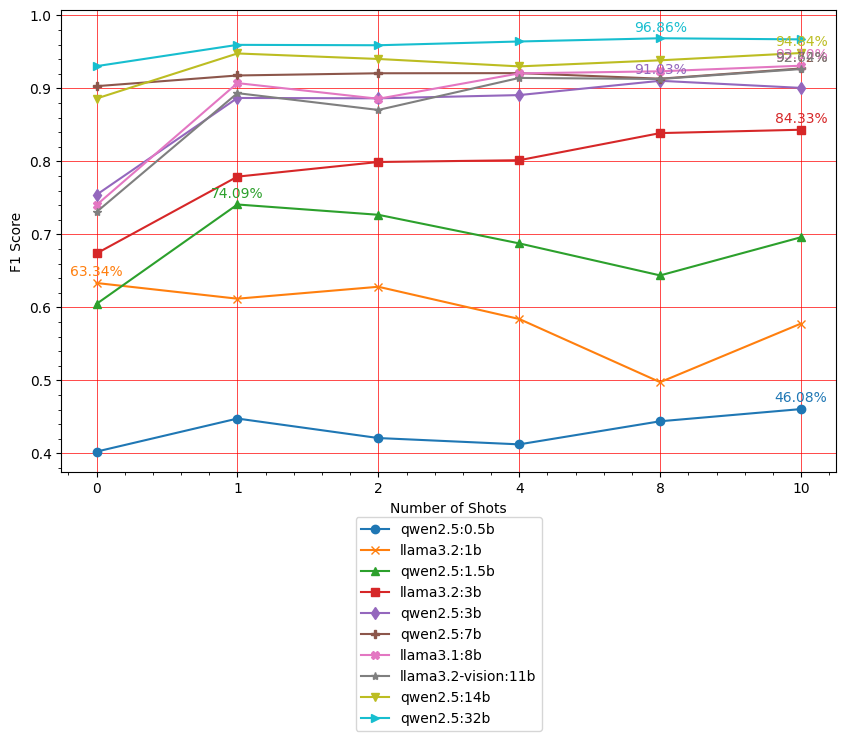

In [17]:
plot_metrics_vs_shots(
    metrics_df,
    models,
    markers,
    ["f1"],
    ["F1 Score"],
    bbox_to_anchor=(0.5, -0.575),
)

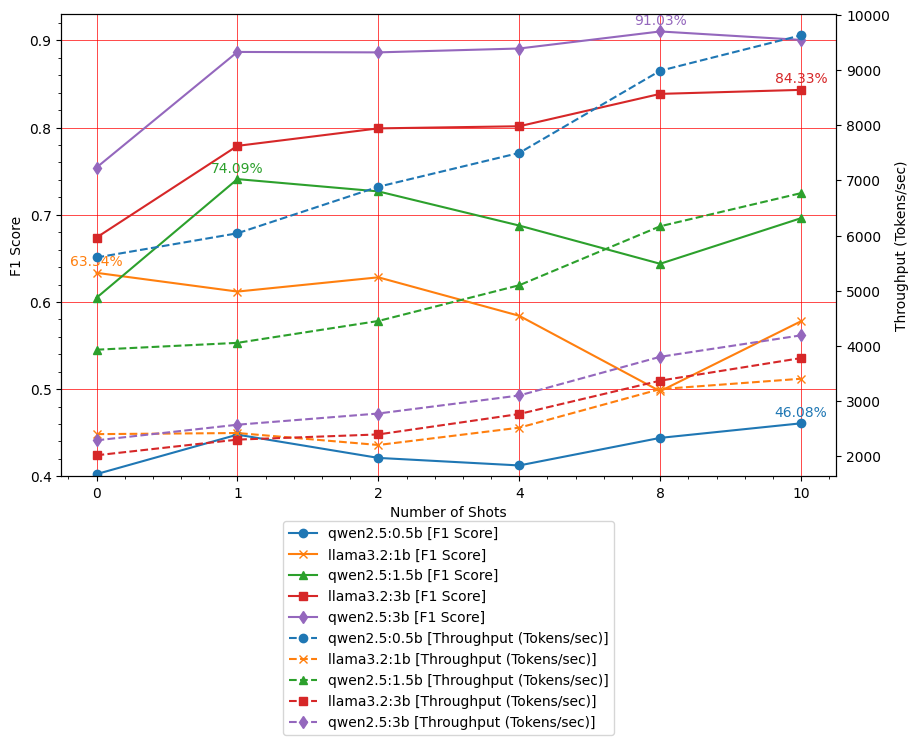

In [18]:
plot_metrics_vs_shots(
    metrics_df,
    models[:5],
    markers[:5],
    ["f1", "eval_speed"],
    ["F1 Score", "Throughput (Tokens/sec)"],
    ylimits=(0.4, 0.92),
    # log_scales=[True],
    bbox_to_anchor=(0.5, -0.575),
)

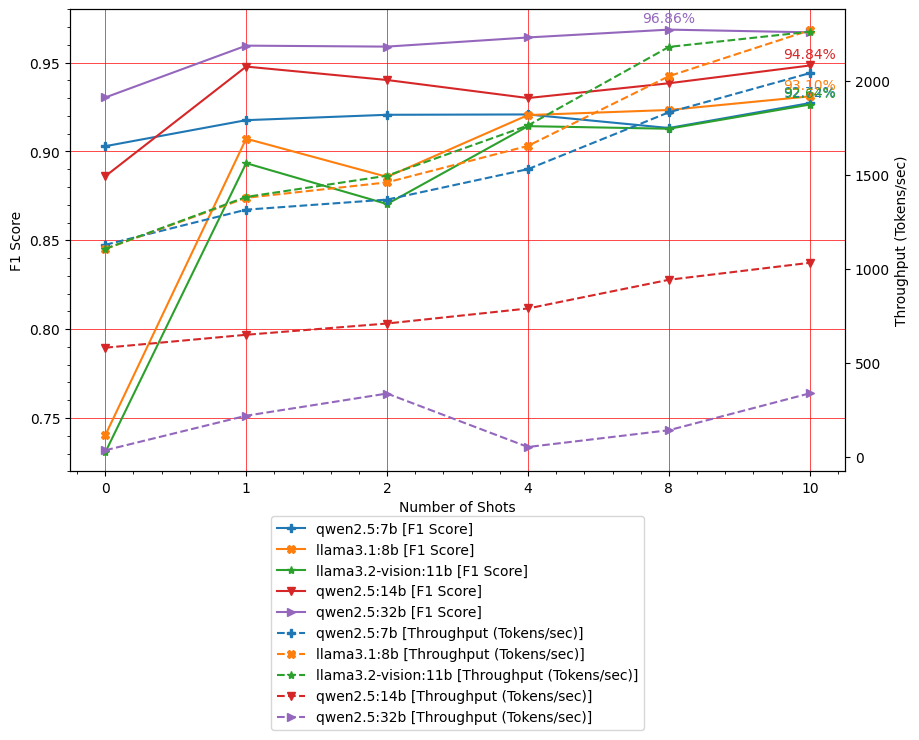

In [19]:
plot_metrics_vs_shots(
    metrics_df,
    models[5:10],
    markers[5:10],
    ["f1", "eval_speed"],
    ["F1 Score", "Throughput (Tokens/sec)"],
    ylimits=(0.72, 0.97),
    # log_scales=[False, True],
    bbox_to_anchor=(0.5, -0.575),
)

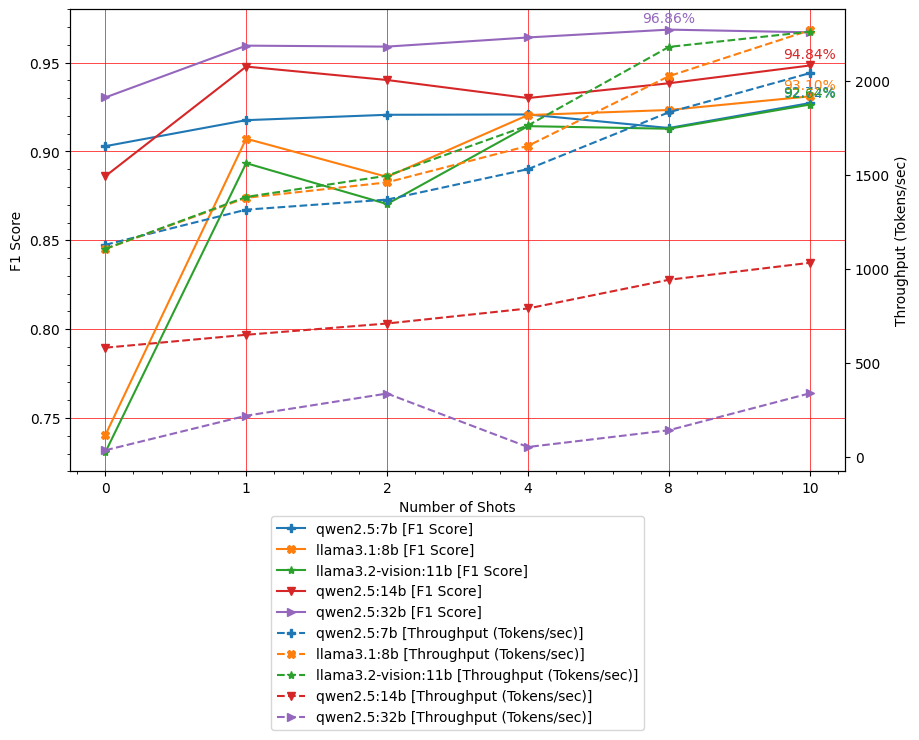

In [20]:
plot_metrics_vs_shots(
    metrics_df,
    models[5:10],
    markers[5:10],
    ["f1", "eval_speed"],
    ["F1 Score", "Throughput (Tokens/sec)"],
    ylimits=(0.72, 0.97),
    # log_scales=[False, True],
    bbox_to_anchor=(0.5, -0.575),
)

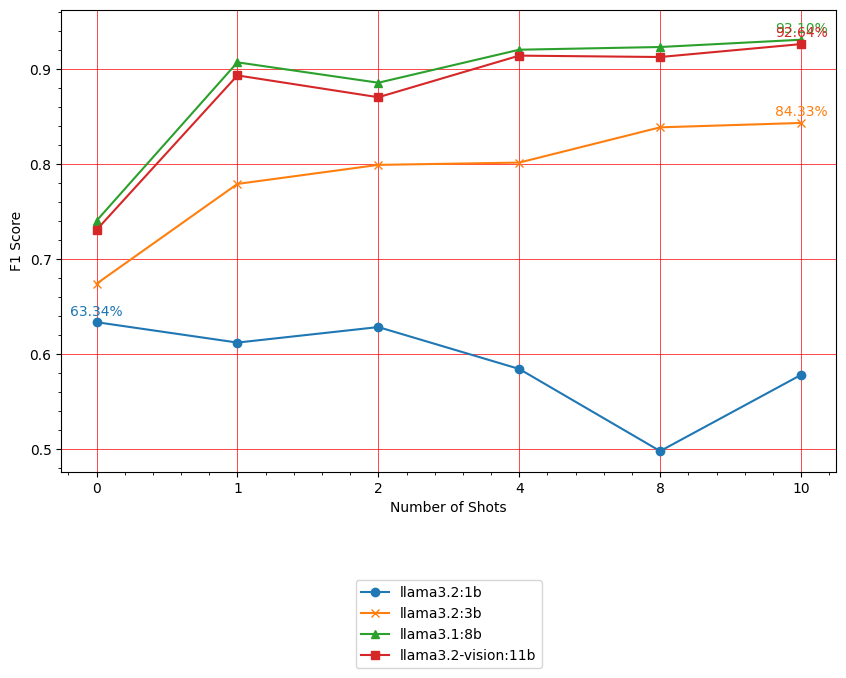

In [21]:
plot_metrics_vs_shots(
    metrics_df,
    llama_models,
    markers,
    ["f1"],
    ["F1 Score"],
    bbox_to_anchor=(0.5, -0.44),
)

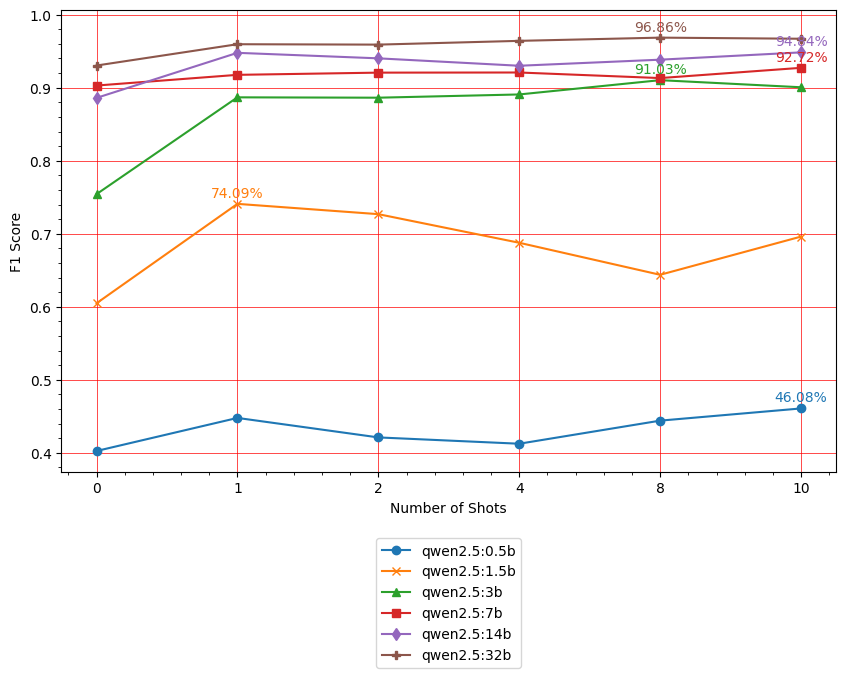

In [22]:
plot_metrics_vs_shots(
    metrics_df,
    qwen_models,
    markers,
    ["f1"],
    ["F1 Score"],
    bbox_to_anchor=(0.5, -0.44),
)

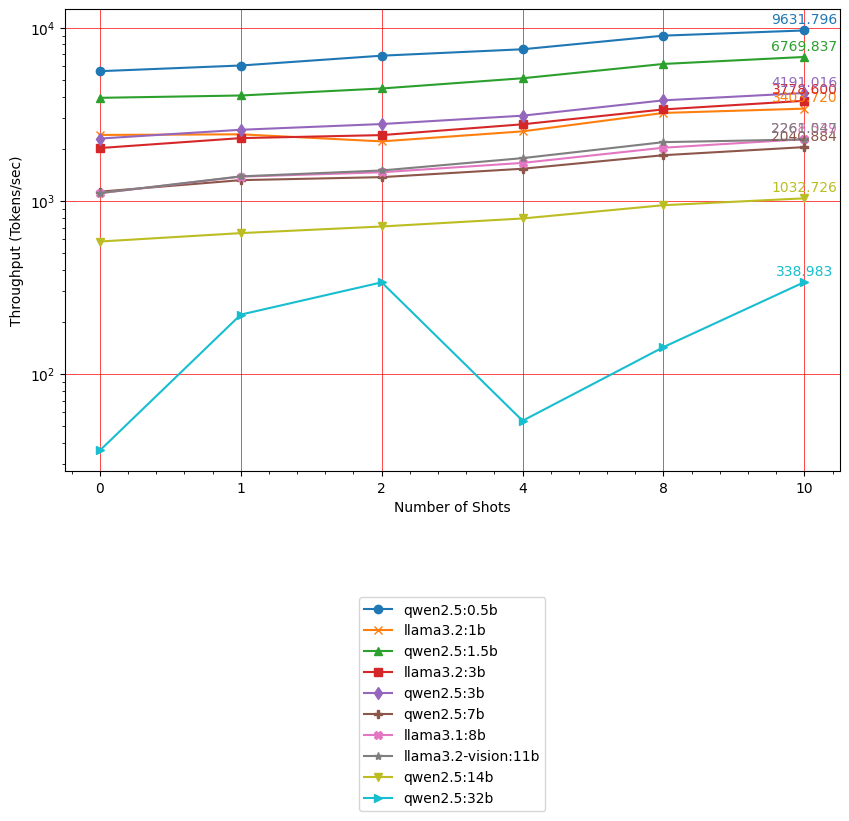

In [23]:
plot_metrics_vs_shots(
    metrics_df,
    models,
    markers,
    ["eval_speed"],
    ["Throughput (Tokens/sec)"],
    log_scales=[True],
    bbox_to_anchor=(0.5, -0.75),
    use_percentage=False,
)

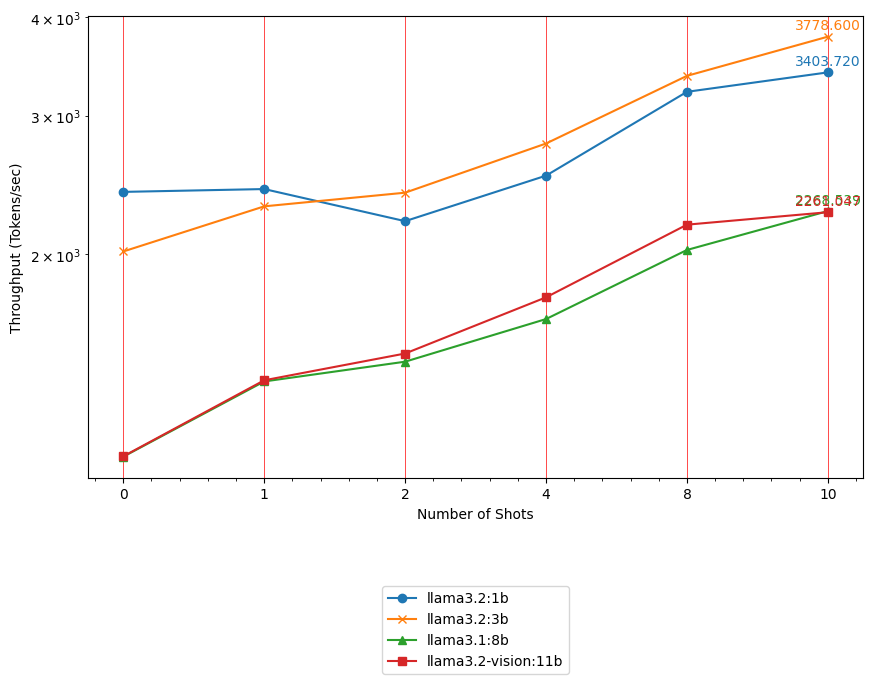

In [24]:
plot_metrics_vs_shots(
    metrics_df,
    llama_models,
    markers,
    ["eval_speed"],
    ["Throughput (Tokens/sec)"],
    log_scales=[True],
    bbox_to_anchor=(0.5, -0.44),
    use_percentage=False,
)

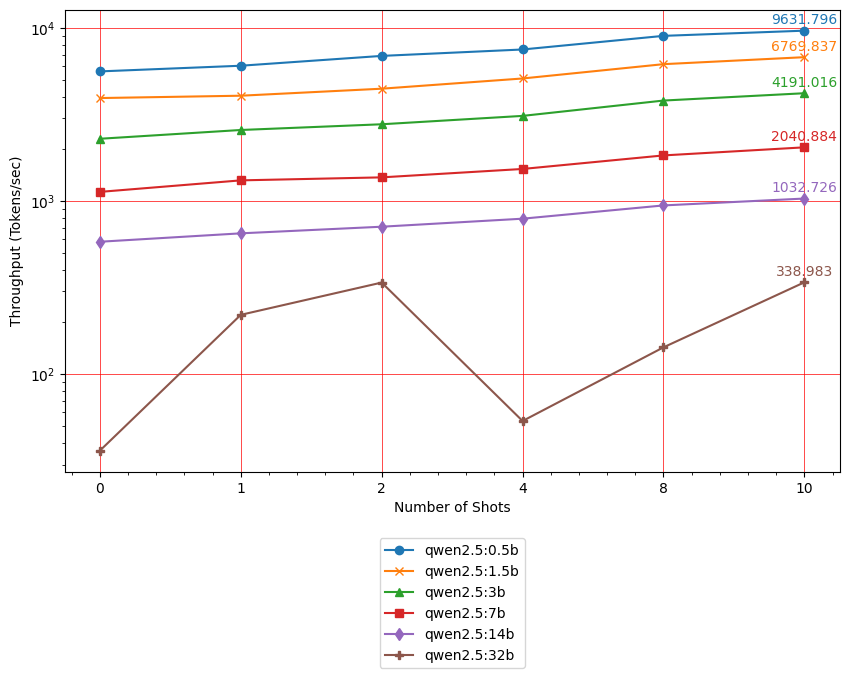

In [25]:
plot_metrics_vs_shots(
    metrics_df,
    qwen_models,
    markers,
    ["eval_speed"],
    ["Throughput (Tokens/sec)"],
    log_scales=[True],
    bbox_to_anchor=(0.5, -0.44),
    use_percentage=False,
)

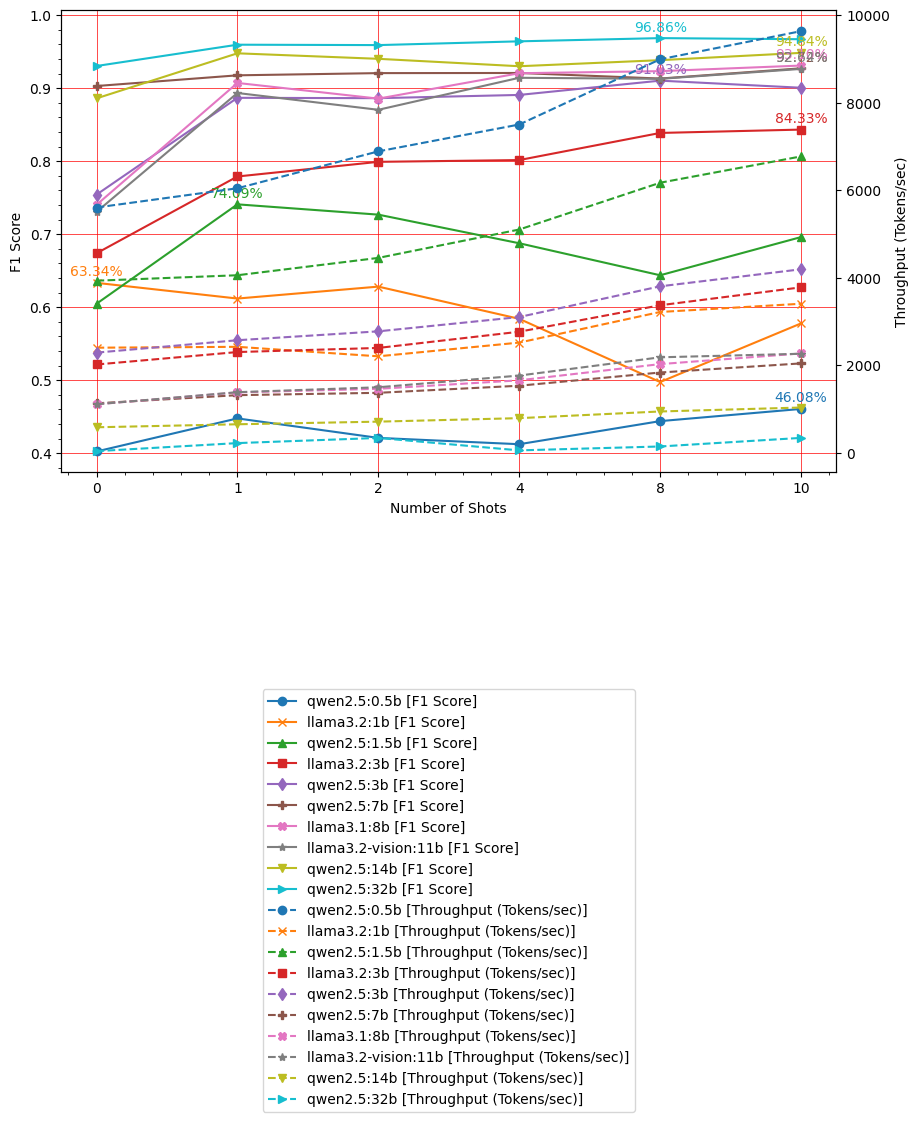

In [26]:
plot_metrics_vs_shots(
    metrics_df,
    models,
    markers,
    ["f1", "eval_speed"],
    ["F1 Score", "Throughput (Tokens/sec)"],
    bbox_to_anchor=(0.5, -1.4),
)

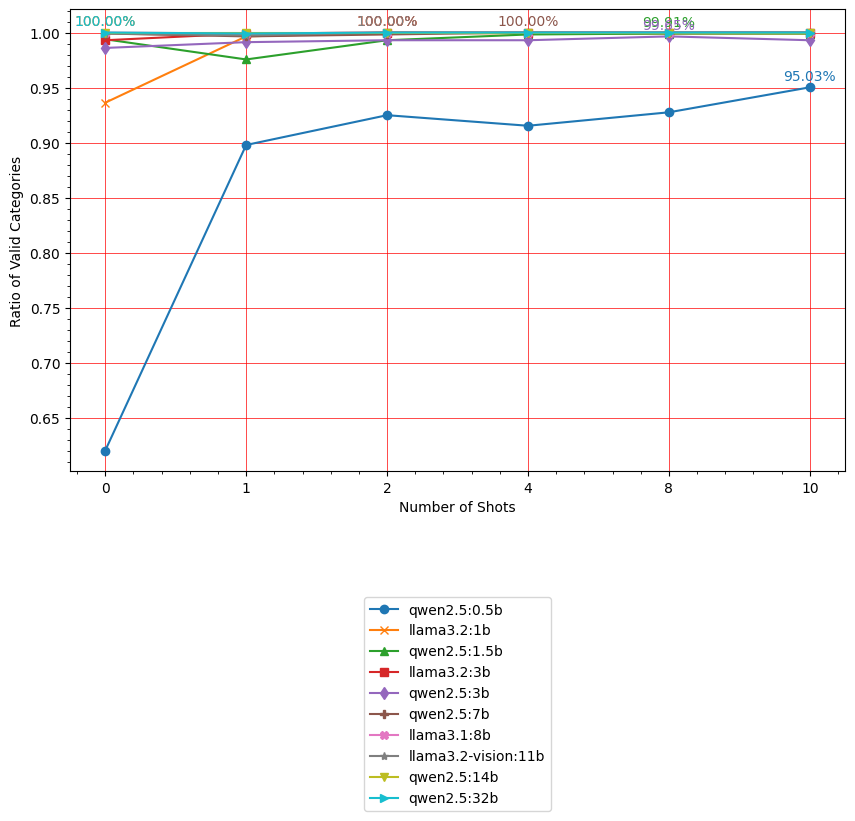

In [27]:
plot_metrics_vs_shots(
    metrics_df,
    models,
    markers,
    ["ratio_valid_categories"],
    ["Ratio of Valid Categories"],
    # log_scales=[True],
    bbox_to_anchor=(0.5, -0.75),
    ylimits_offset=0.002,
)

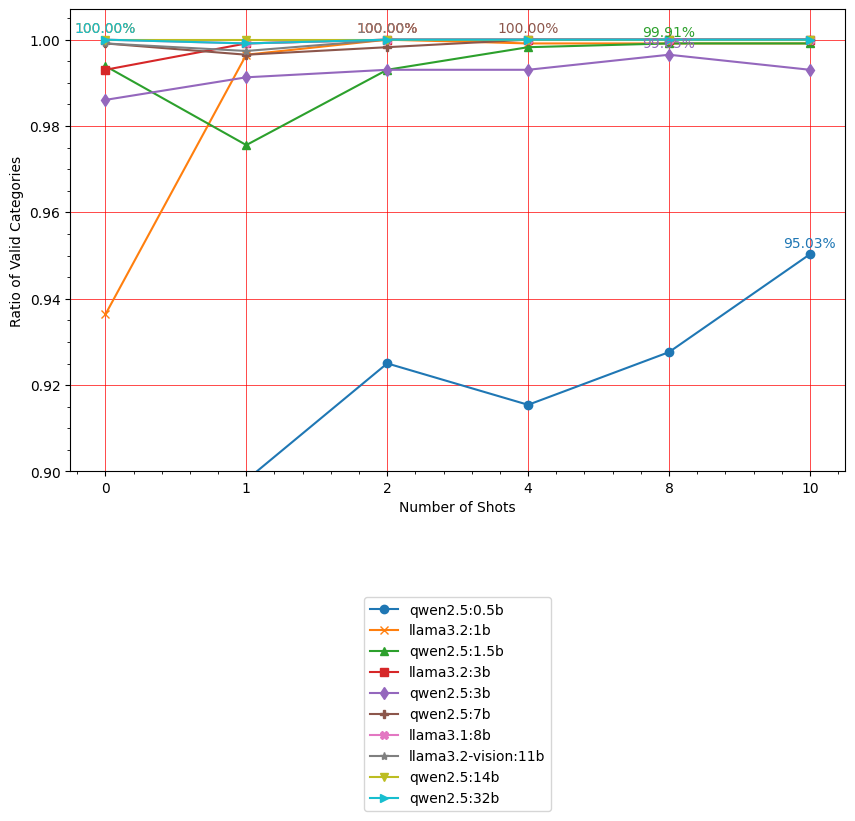

In [28]:
plot_metrics_vs_shots(
    metrics_df,
    models,
    markers,
    ["ratio_valid_categories"],
    ["Ratio of Valid Categories"],
    # log_scales=[True],
    bbox_to_anchor=(0.5, -0.75),
    ylimits=[0.9, 1.005],
    ylimits_offset=0.002,
)

In [29]:
top_metrics_df = get_top_metrics_df(metrics_df)
top_metrics_df

model  shots  eval_time        f1  accuracy  \
5                         qwen2.5:0.5b     10      0.218  0.460776  0.498692   
11          qwen2.5:0.5b-instruct-fp16     10      0.269  0.461571  0.470793   
12                         llama3.2:1b      0      0.451  0.633410  0.585004   
20           llama3.2:1b-instruct-fp16      2      0.736  0.641802  0.619878   
25                        qwen2.5:1.5b      1      0.289  0.740926  0.655623   
31          qwen2.5:1.5b-instruct-fp16      1      0.380  0.786385  0.733217   
41                         llama3.2:3b     10      0.553  0.843299  0.836966   
47           llama3.2:3b-instruct-fp16     10      0.756  0.828877  0.824760   
52                          qwen2.5:3b      8      0.487  0.910320  0.892764   
59            qwen2.5:3b-instruct-fp16     10      0.677  0.902893  0.886661   
65                          qwen2.5:7b     10      1.030  0.927221  0.921534   
71            qwen2.5:7b-instruct-fp16     10      1.392  0.927447  0.923278   
77                         llama3.1:8b     10      0.921  0.930997  0.931125   
83           llama3.1:8b-instruct-fp16     10      1.366  0.939099  0.937228   
89                 llama3.2-vision:11b     10      0.924  0.926393  0.925894   
95   llama3.2-vision:11b-instruct-fp16     10      1.401  0.940109  0.938971   
101                        qwen2.5:14b     10      2.035  0.948369  0.945074   
107          qwen2.5:14b-instruct-fp16     10      3.130  0.942645  0.938099   
112                        qwen2.5:32b      8     12.995  0.968563  0.967742   

     f1_raw  accuracy_raw  ratio_valid_categories  total_tokens   eval_speed  
5       0.0           0.0                0.950305       2408392  9631.795750  
11      0.0           0.0                0.934612       2408457  7805.903877  
12      0.0           0.0                0.936356       1241277  2399.544169  
20      0.0           0.0                1.000000       1485749  1759.965742  
25      0.0           0.0                0.975588       1344085  4054.762989  
31      0.0           0.0                0.984307       1344509  3084.726747  
41      0.0           0.0                1.000000       2396732  3778.600043  
47      0.0           0.0                1.000000       2396771  2764.020933  
52      0.0           0.0                0.996513       2123680  3801.865056  
59      0.0           0.0                0.999128       2409067  3102.392858  
65      0.0           0.0                1.000000       2411121  2040.884198  
71      0.0           0.0                1.000000       2409370  1509.040325  
77      0.0           0.0                1.000000       2396455  2268.538897  
83      0.0           0.0                1.000000       2396180  1529.344486  
89      0.0           0.0                1.000000       2396321  2261.047076  
95      0.0           0.0                1.000000       2396234  1491.171769  
101     0.0           0.0                1.000000       2410532  1032.725902  
107     0.0           0.0                1.000000       2411144   671.607277  
112     0.0           0.0                1.000000       2127750   142.751571

/Users/inflaton/code/engd/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py:1125: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df['model'], rotation=45, ha='right')


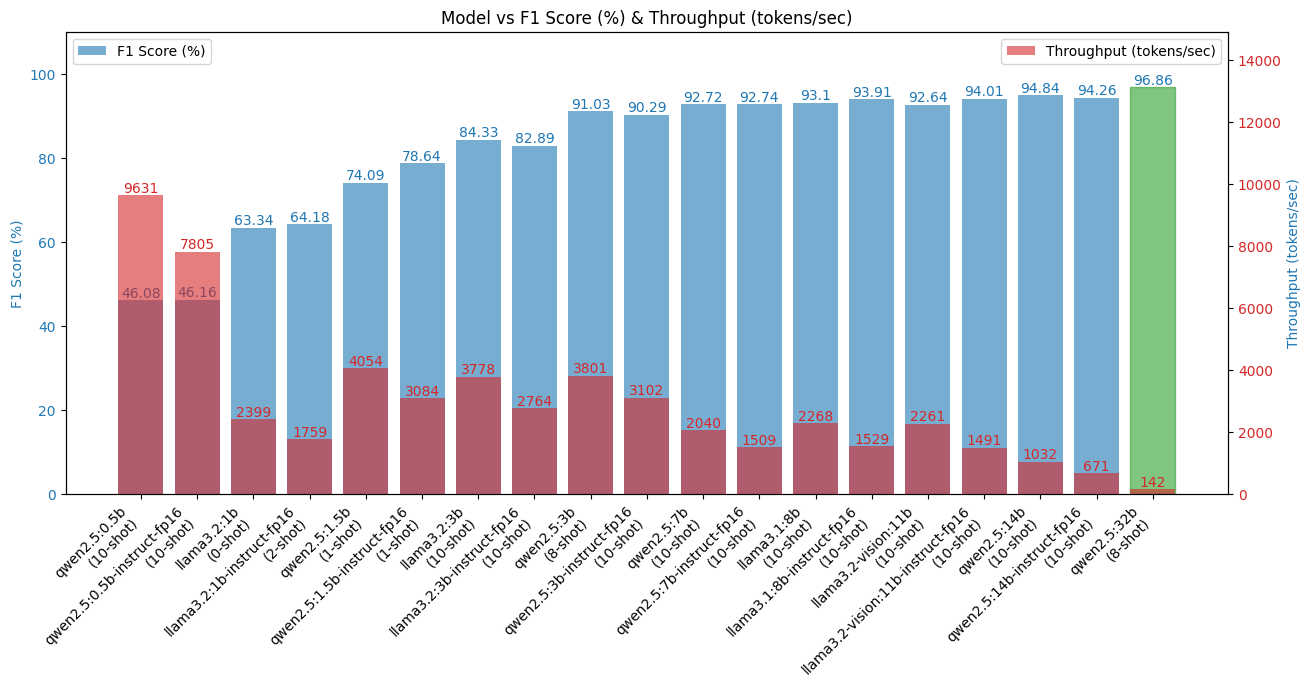

In [30]:
plot_metrics_bar_charts(top_metrics_df, second_ylim=[0, 14900])

/Users/inflaton/code/engd/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py:1125: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df['model'], rotation=45, ha='right')


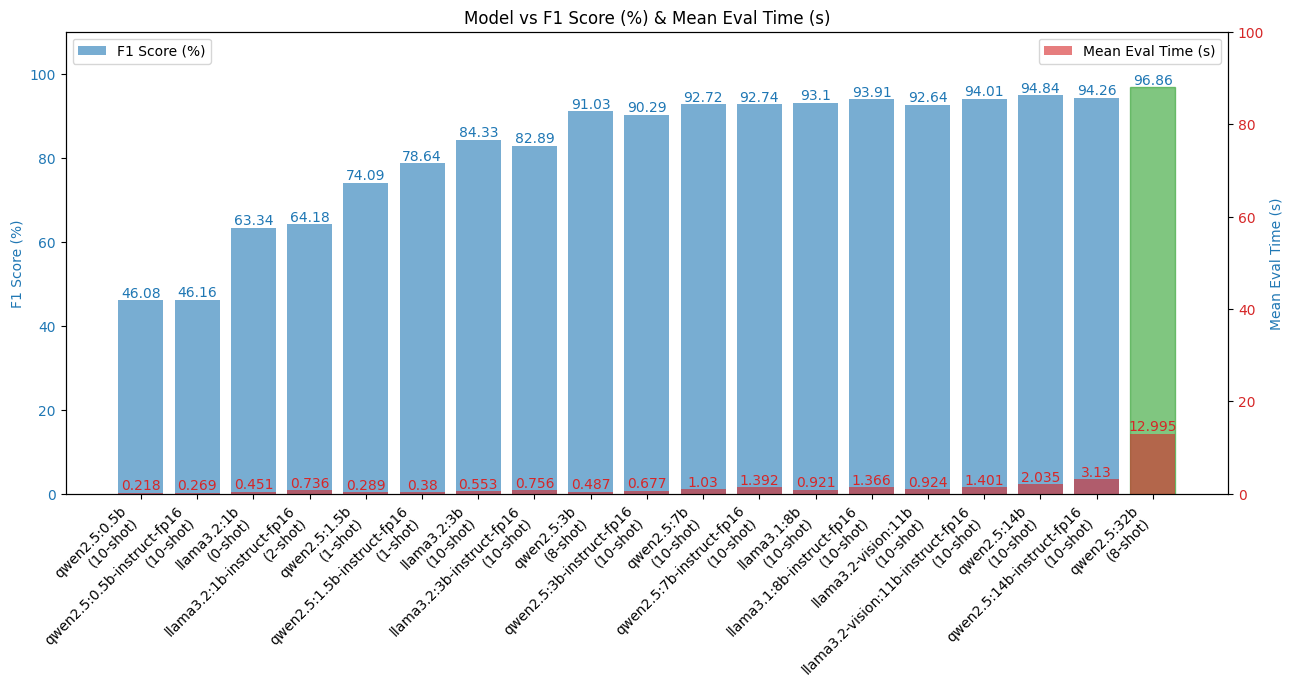

In [31]:
plot_metrics_bar_charts(
    top_metrics_df,
    second_column="eval_time",
    second_title="Mean Eval Time (s)",
    second_ylim=(0, 100),
    second_decimals=3,
)

In [32]:
ensemble_models = [
    m
    for m in all_models
    if "fp" not in m
    and top_metrics_df[top_metrics_df["model"] == m].iloc[0]["f1"] >= 0.9
]
ensemble_models

['qwen2.5:3b',
 'qwen2.5:7b',
 'llama3.1:8b',
 'llama3.2-vision:11b',
 'qwen2.5:14b',
 'qwen2.5:32b']

In [33]:
ensemble_models = ensemble_models[:5]
ensemble_models

['qwen2.5:3b',
 'qwen2.5:7b',
 'llama3.1:8b',
 'llama3.2-vision:11b',
 'qwen2.5:14b']

In [34]:
def majority_vote(v1, v2, v3):
    v1_ans, v2_ans, v3_ans = extract_answer(v1), extract_answer(v2), extract_answer(v3)
    if v2_ans == v3_ans and v3_ans != v1_ans:
        return v2

    return v1

In [35]:
import itertools

permutations = list(itertools.combinations(ensemble_models, 3))

for perm in permutations:
    print(perm)

('qwen2.5:3b', 'qwen2.5:7b', 'llama3.1:8b')
('qwen2.5:3b', 'qwen2.5:7b', 'llama3.2-vision:11b')
('qwen2.5:3b', 'qwen2.5:7b', 'qwen2.5:14b')
('qwen2.5:3b', 'llama3.1:8b', 'llama3.2-vision:11b')
('qwen2.5:3b', 'llama3.1:8b', 'qwen2.5:14b')
('qwen2.5:3b', 'llama3.2-vision:11b', 'qwen2.5:14b')
('qwen2.5:7b', 'llama3.1:8b', 'llama3.2-vision:11b')
('qwen2.5:7b', 'llama3.1:8b', 'qwen2.5:14b')
('qwen2.5:7b', 'llama3.2-vision:11b', 'qwen2.5:14b')
('llama3.1:8b', 'llama3.2-vision:11b', 'qwen2.5:14b')


In [36]:
for perm in permutations:
    print(perm)
    selected_rows = top_metrics_df[top_metrics_df["model"].isin(perm)]
    selected_rows = selected_rows.sort_values(by="f1", ascending=False)

    columns = []
    shots = 0
    eval_time = 0
    title = None
    for idx, row in selected_rows.iterrows():
        columns.append(
            f"{row['model']}/shots-{row['shots']:02d}({row['eval_time']:.3f})"
        )
        shots += row["shots"]
        eval_time += row["eval_time"]
        if title:
            title += f"_{row['model']}"
        else:
            title = row["model"]

    print(title, eval_time, columns)

    df_results[f"{title}/shots-{shots}({eval_time:.3f})"] = df_results.apply(
        lambda x: majority_vote(x[columns[0]], x[columns[1]], x[columns[2]]), axis=1
    )

('qwen2.5:3b', 'qwen2.5:7b', 'llama3.1:8b')
llama3.1:8b_qwen2.5:7b_qwen2.5:3b 2.438 ['llama3.1:8b/shots-10(0.921)', 'qwen2.5:7b/shots-10(1.030)', 'qwen2.5:3b/shots-08(0.487)']
('qwen2.5:3b', 'qwen2.5:7b', 'llama3.2-vision:11b')
qwen2.5:7b_llama3.2-vision:11b_qwen2.5:3b 2.4410000000000003 ['qwen2.5:7b/shots-10(1.030)', 'llama3.2-vision:11b/shots-10(0.924)', 'qwen2.5:3b/shots-08(0.487)']
('qwen2.5:3b', 'qwen2.5:7b', 'qwen2.5:14b')
qwen2.5:14b_qwen2.5:7b_qwen2.5:3b 3.5520000000000005 ['qwen2.5:14b/shots-10(2.035)', 'qwen2.5:7b/shots-10(1.030)', 'qwen2.5:3b/shots-08(0.487)']
('qwen2.5:3b', 'llama3.1:8b', 'llama3.2-vision:11b')
llama3.1:8b_llama3.2-vision:11b_qwen2.5:3b 2.3320000000000003 ['llama3.1:8b/shots-10(0.921)', 'llama3.2-vision:11b/shots-10(0.924)', 'qwen2.5:3b/shots-08(0.487)']
('qwen2.5:3b', 'llama3.1:8b', 'qwen2.5:14b')
qwen2.5:14b_llama3.1:8b_qwen2.5:3b 3.4430000000000005 ['qwen2.5:14b/shots-10(2.035)', 'llama3.1:8b/shots-10(0.921)', 'qwen2.5:3b/shots-08(0.487)']
('qwen2.5:3b',

In [37]:
ensemble_metrics_df = get_metrics(
    df_results, -len(permutations), mean_eval_time=True, label_column="gpt-4o_label"
)
ensemble_metrics_df

llama3.1:8b_qwen2.5:7b_qwen2.5:3b/shots-28(2.438) - metrics_raw: {'f1': 0.0, 'accuracy': 0.0}
llama3.1:8b_qwen2.5:7b_qwen2.5:3b/shots-28(2.438) - metrics: {'f1': 0.9449114392597371, 'accuracy': 0.942458587619878}
Generating prompt templates for 28 shots with Headline_Details and gpt-4o_label
qwen2.5:7b_llama3.2-vision:11b_qwen2.5:3b/shots-28(2.441) - metrics_raw: {'f1': 0.0, 'accuracy': 0.0}
qwen2.5:7b_llama3.2-vision:11b_qwen2.5:3b/shots-28(2.441) - metrics: {'f1': 0.9408645506147144, 'accuracy': 0.937227550130776}
Generating prompt templates for 28 shots with Headline_Details and gpt-4o_label
qwen2.5:14b_qwen2.5:7b_qwen2.5:3b/shots-28(3.552) - metrics_raw: {'f1': 0.0, 'accuracy': 0.0}
qwen2.5:14b_qwen2.5:7b_qwen2.5:3b/shots-28(3.552) - metrics: {'f1': 0.942901789494383, 'accuracy': 0.9389712292938099}
Generating prompt templates for 28 shots with Headline_Details and gpt-4o_label
llama3.1:8b_llama3.2-vision:11b_qwen2.5:3b/shots-28(2.332) - metrics_raw: {'f1': 0.0, 'accuracy': 0.0}
ll

model  shots  eval_time        f1  \
0            llama3.1:8b_qwen2.5:7b_qwen2.5:3b     28      2.438  0.944911   
1    qwen2.5:7b_llama3.2-vision:11b_qwen2.5:3b     28      2.441  0.940865   
2            qwen2.5:14b_qwen2.5:7b_qwen2.5:3b     28      3.552  0.942902   
3   llama3.1:8b_llama3.2-vision:11b_qwen2.5:3b     28      2.332  0.934065   
4           qwen2.5:14b_llama3.1:8b_qwen2.5:3b     28      3.443  0.947634   
5   qwen2.5:14b_llama3.2-vision:11b_qwen2.5:3b     28      3.446  0.944189   
6   llama3.1:8b_qwen2.5:7b_llama3.2-vision:11b     30      2.875  0.932068   
7           qwen2.5:14b_llama3.1:8b_qwen2.5:7b     30      3.986  0.951021   
8   qwen2.5:14b_qwen2.5:7b_llama3.2-vision:11b     30      3.989  0.951056   
9  qwen2.5:14b_llama3.1:8b_llama3.2-vision:11b     30      3.880  0.934610   

   accuracy  f1_raw  accuracy_raw  ratio_valid_categories  total_tokens  \
0  0.942459     0.0           0.0                     1.0       2505153   
1  0.937228     0.0           0.0                     1.0       2506112   
2  0.938971     0.0           0.0                     1.0       2505807   
3  0.933740     0.0           0.0                     1.0       2505122   
4  0.945946     0.0           0.0                     1.0       2505667   
5  0.941587     0.0           0.0                     1.0       2505672   
6  0.931997     0.0           0.0                     1.0       2505127   
7  0.950305     0.0           0.0                     1.0       2505695   
8  0.950305     0.0           0.0                     1.0       2505819   
9  0.934612     0.0           0.0                     1.0       2505752   

   eval_speed  
0  895.853791  
1  895.095304  
2  615.051162  
3  936.562829  
4  634.487269  
5  633.936166  
6  759.676131  
7  548.059227  
8  547.674151  
9  563.044787

In [38]:
top_performance = {row["model"]: row["f1"] for _, row in top_metrics_df.iterrows()}
top_performance

{'qwen2.5:0.5b': 0.4607762850017359,
 'qwen2.5:0.5b-instruct-fp16': 0.46157056784164735,
 'llama3.2:1b': 0.6334095439163007,
 'llama3.2:1b-instruct-fp16': 0.6418024478682549,
 'qwen2.5:1.5b': 0.7409258673287997,
 'qwen2.5:1.5b-instruct-fp16': 0.7863848043847078,
 'llama3.2:3b': 0.8432985562944934,
 'llama3.2:3b-instruct-fp16': 0.8288766828424479,
 'qwen2.5:3b': 0.9103202487154557,
 'qwen2.5:3b-instruct-fp16': 0.9028931444389707,
 'qwen2.5:7b': 0.9272211362199908,
 'qwen2.5:7b-instruct-fp16': 0.9274469202053813,
 'llama3.1:8b': 0.93099703928699,
 'llama3.1:8b-instruct-fp16': 0.9390990875358718,
 'llama3.2-vision:11b': 0.9263934001373815,
 'llama3.2-vision:11b-instruct-fp16': 0.9401086195117214,
 'qwen2.5:14b': 0.9483691923926404,
 'qwen2.5:14b-instruct-fp16': 0.9426446543235734,
 'qwen2.5:32b': 0.9685631585062772}

In [39]:
indices = []
for idx, row in ensemble_metrics_df.iterrows():
    for model in top_performance.keys():
        if row["model"].startswith(model) and row["f1"] > top_performance[model]:
            indices.append(idx)
            break

ensemble_metrics_df = ensemble_metrics_df.loc[indices]
ensemble_metrics_df

model  shots  eval_time        f1  \
0           llama3.1:8b_qwen2.5:7b_qwen2.5:3b     28      2.438  0.944911   
1   qwen2.5:7b_llama3.2-vision:11b_qwen2.5:3b     28      2.441  0.940865   
3  llama3.1:8b_llama3.2-vision:11b_qwen2.5:3b     28      2.332  0.934065   
6  llama3.1:8b_qwen2.5:7b_llama3.2-vision:11b     30      2.875  0.932068   
7          qwen2.5:14b_llama3.1:8b_qwen2.5:7b     30      3.986  0.951021   
8  qwen2.5:14b_qwen2.5:7b_llama3.2-vision:11b     30      3.989  0.951056   

   accuracy  f1_raw  accuracy_raw  ratio_valid_categories  total_tokens  \
0  0.942459     0.0           0.0                     1.0       2505153   
1  0.937228     0.0           0.0                     1.0       2506112   
3  0.933740     0.0           0.0                     1.0       2505122   
6  0.931997     0.0           0.0                     1.0       2505127   
7  0.950305     0.0           0.0                     1.0       2505695   
8  0.950305     0.0           0.0                     1.0       2505819   

   eval_speed  
0  895.853791  
1  895.095304  
3  936.562829  
6  759.676131  
7  548.059227  
8  547.674151

In [40]:
# Concatenate vertically
top_metrics_df = pd.concat([top_metrics_df, ensemble_metrics_df], axis=0).reset_index(
    drop=True
)
top_metrics_df

model  shots  eval_time        f1  \
0                                 qwen2.5:0.5b     10      0.218  0.460776   
1                   qwen2.5:0.5b-instruct-fp16     10      0.269  0.461571   
2                                  llama3.2:1b      0      0.451  0.633410   
3                    llama3.2:1b-instruct-fp16      2      0.736  0.641802   
4                                 qwen2.5:1.5b      1      0.289  0.740926   
5                   qwen2.5:1.5b-instruct-fp16      1      0.380  0.786385   
6                                  llama3.2:3b     10      0.553  0.843299   
7                    llama3.2:3b-instruct-fp16     10      0.756  0.828877   
8                                   qwen2.5:3b      8      0.487  0.910320   
9                     qwen2.5:3b-instruct-fp16     10      0.677  0.902893   
10                                  qwen2.5:7b     10      1.030  0.927221   
11                    qwen2.5:7b-instruct-fp16     10      1.392  0.927447   
12                                 llama3.1:8b     10      0.921  0.930997   
13                   llama3.1:8b-instruct-fp16     10      1.366  0.939099   
14                         llama3.2-vision:11b     10      0.924  0.926393   
15           llama3.2-vision:11b-instruct-fp16     10      1.401  0.940109   
16                                 qwen2.5:14b     10      2.035  0.948369   
17                   qwen2.5:14b-instruct-fp16     10      3.130  0.942645   
18                                 qwen2.5:32b      8     12.995  0.968563   
19           llama3.1:8b_qwen2.5:7b_qwen2.5:3b     28      2.438  0.944911   
20   qwen2.5:7b_llama3.2-vision:11b_qwen2.5:3b     28      2.441  0.940865   
21  llama3.1:8b_llama3.2-vision:11b_qwen2.5:3b     28      2.332  0.934065   
22  llama3.1:8b_qwen2.5:7b_llama3.2-vision:11b     30      2.875  0.932068   
23          qwen2.5:14b_llama3.1:8b_qwen2.5:7b     30      3.986  0.951021   
24  qwen2.5:14b_qwen2.5:7b_llama3.2-vision:11b     30      3.989  0.951056   

    accuracy  f1_raw  accuracy_raw  ratio_valid_categories  total_tokens  \
0   0.498692     0.0           0.0                0.950305       2408392   
1   0.470793     0.0           0.0                0.934612       2408457   
2   0.585004     0.0           0.0                0.936356       1241277   
3   0.619878     0.0           0.0                1.000000       1485749   
4   0.655623     0.0           0.0                0.975588       1344085   
5   0.733217     0.0           0.0                0.984307       1344509   
6   0.836966     0.0           0.0                1.000000       2396732   
7   0.824760     0.0           0.0                1.000000       2396771   
8   0.892764     0.0           0.0                0.996513       2123680   
9   0.886661     0.0           0.0                0.999128       2409067   
10  0.921534     0.0           0.0                1.000000       2411121   
11  0.923278     0.0           0.0                1.000000       2409370   
12  0.931125     0.0           0.0                1.000000       2396455   
13  0.937228     0.0           0.0                1.000000       2396180   
14  0.925894     0.0           0.0                1.000000       2396321   
15  0.938971     0.0           0.0                1.000000       2396234   
16  0.945074     0.0           0.0                1.000000       2410532   
17  0.938099     0.0           0.0                1.000000       2411144   
18  0.967742     0.0           0.0                1.000000       2127750   
19  0.942459     0.0           0.0                1.000000       2505153   
20  0.937228     0.0           0.0                1.000000       2506112   
21  0.933740     0.0           0.0                1.000000       2505122   
22  0.931997     0.0           0.0                1.000000       2505127   
23  0.950305     0.0           0.0                1.000000       2505695   
24  0.950305     0.0           0.0                1.000000       2505819   

     eval_speed  
0   9631.795750  

In [41]:
best_top_metrics_df = top_metrics_df[top_metrics_df["f1"] >= 0.9]

/Users/inflaton/code/engd/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py:1125: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df['model'], rotation=45, ha='right')


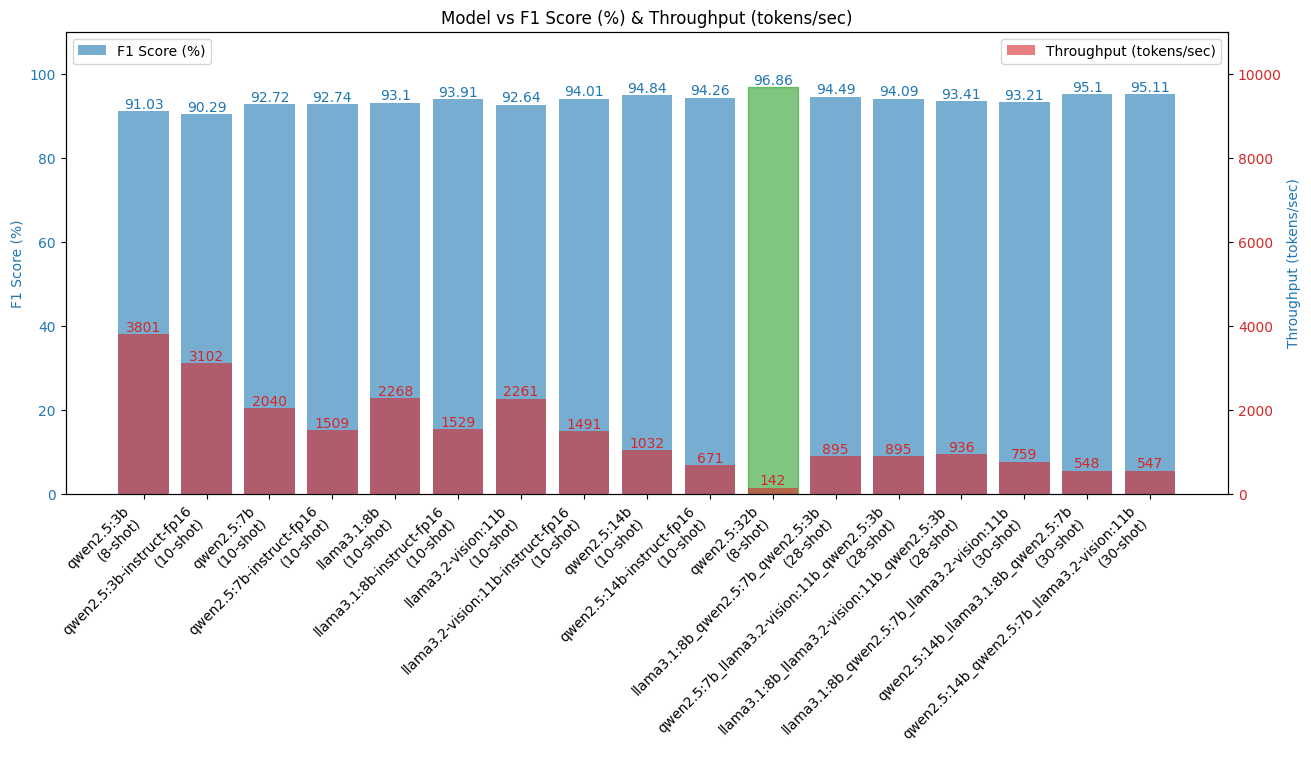

In [42]:
plot_metrics_bar_charts(best_top_metrics_df, second_ylim=[0, 11000])

/Users/inflaton/code/engd/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py:1125: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df['model'], rotation=45, ha='right')


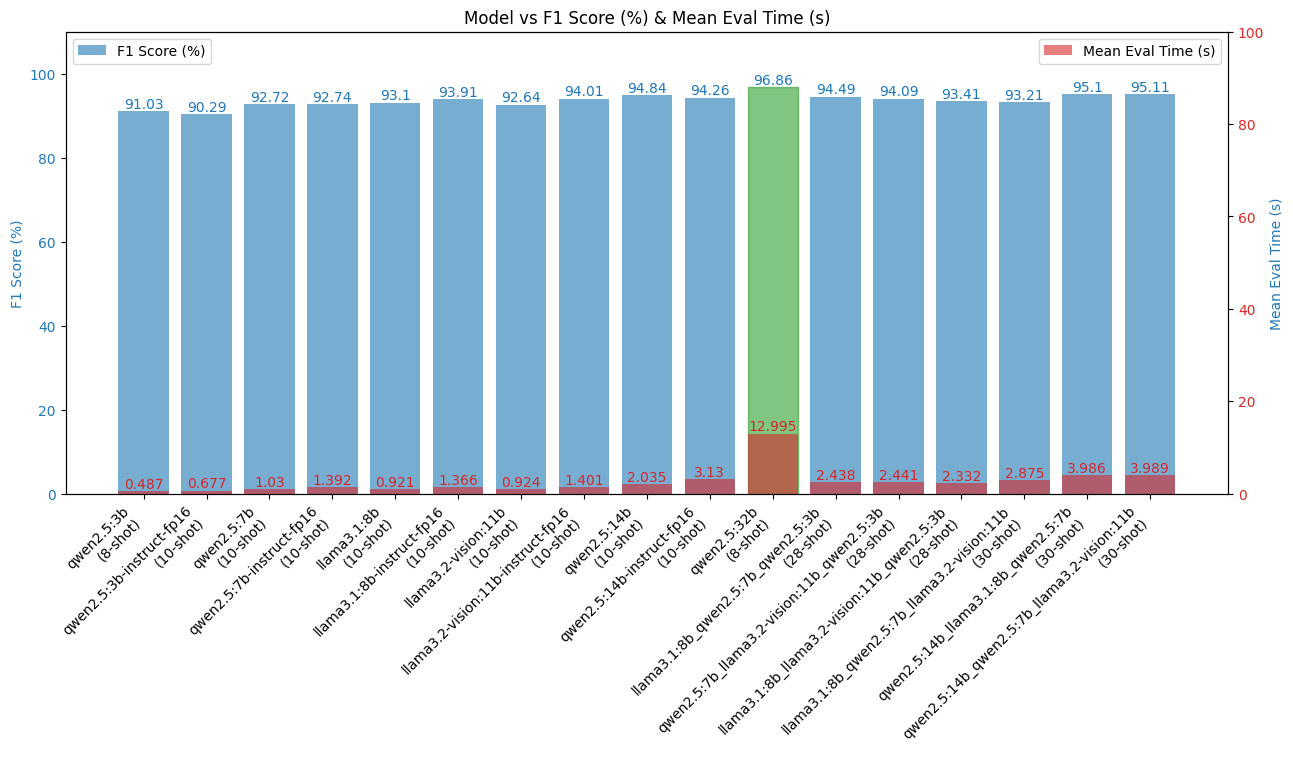

In [43]:
plot_metrics_bar_charts(
    best_top_metrics_df,
    second_column="eval_time",
    second_title="Mean Eval Time (s)",
    second_ylim=(0, 100),
    second_decimals=3,
)

In [44]:
top_metrics_df.describe()

shots  eval_time         f1   accuracy  f1_raw  accuracy_raw  \
count  25.00000   25.00000  25.000000  25.000000    25.0          25.0   
mean   12.96000    1.92284   0.852604   0.843173     0.0           0.0   
std     9.76166    2.57372   0.149937   0.153251     0.0           0.0   
min     0.00000    0.21800   0.460776   0.470793     0.0           0.0   
25%    10.00000    0.55300   0.828877   0.824760     0.0           0.0   
50%    10.00000    1.03000   0.927447   0.925894     0.0           0.0   
75%    10.00000    2.43800   0.940865   0.938099     0.0           0.0   
max    30.00000   12.99500   0.968563   0.967742     0.0           0.0   

       ratio_valid_categories  total_tokens   eval_speed  
count               25.000000  2.500000e+01    25.000000  
mean                 0.991072  2.237874e+06  2388.544444  
std                  0.020061  4.066325e+05  2220.579649  
min                  0.934612  1.241277e+06   142.751571  
25%                  0.999128  2.396180e+06   895.853791  
50%                  1.000000  2.408392e+06  1759.965742  
75%                  1.000000  2.411144e+06  3084.726747  
max                  1.000000  2.506112e+06  9631.795750

In [45]:
metrics_df.to_csv(results_path.replace(".csv", "_metrics.csv"), index=False)
top_metrics_df.to_csv(results_path.replace(".csv", "_top_metrics.csv"), index=False)

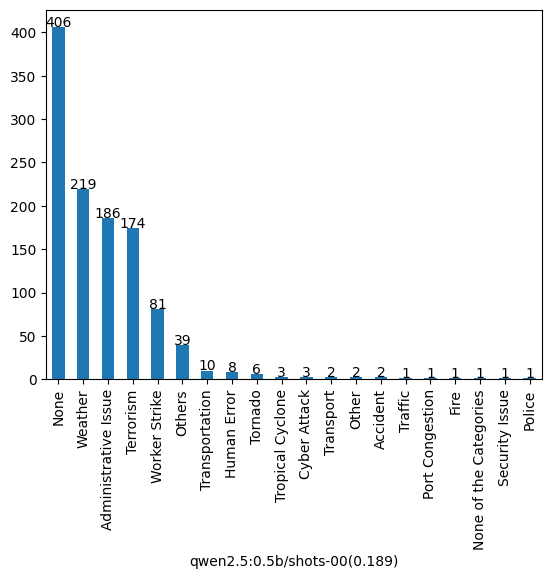

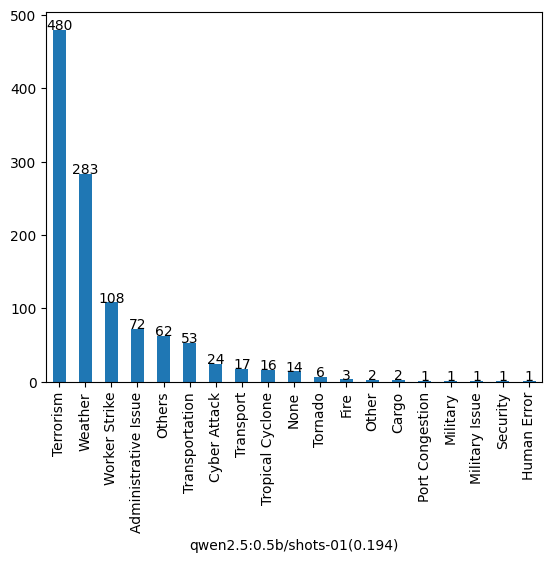

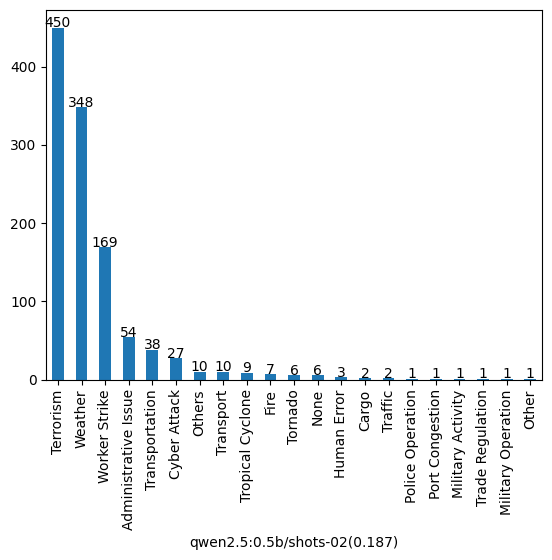

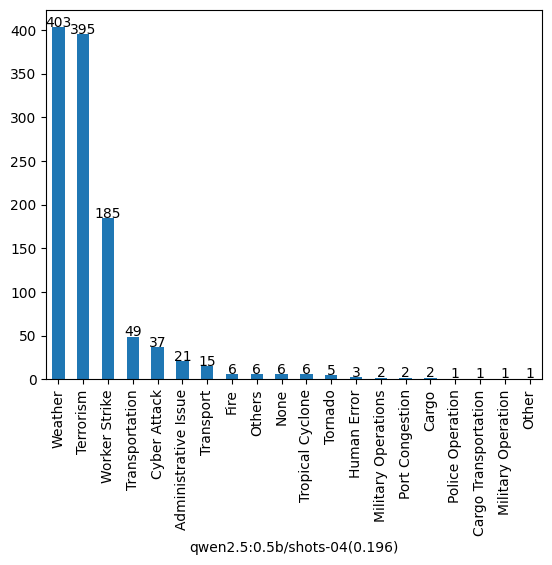

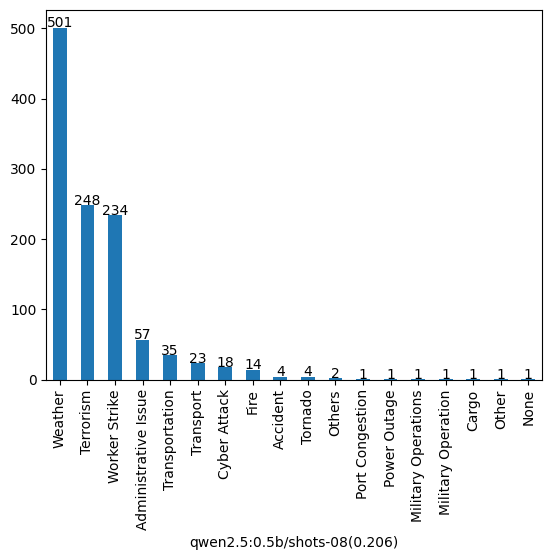

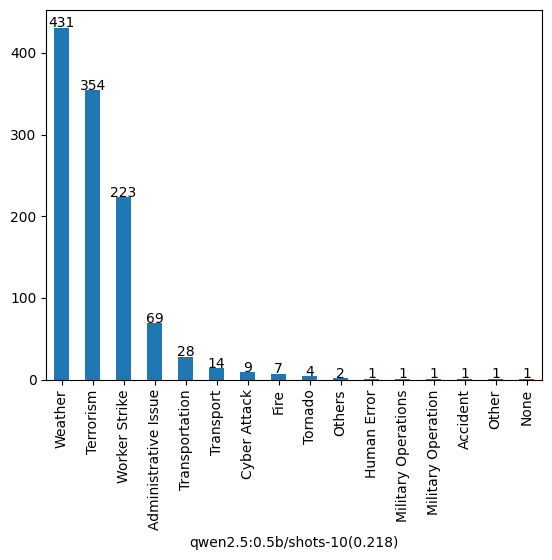

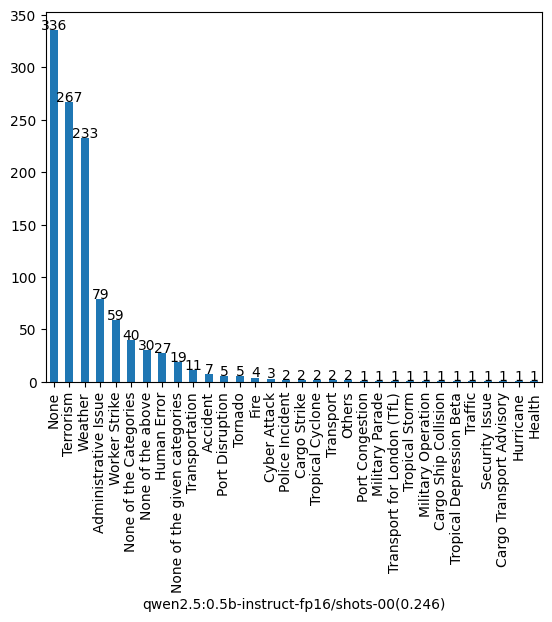

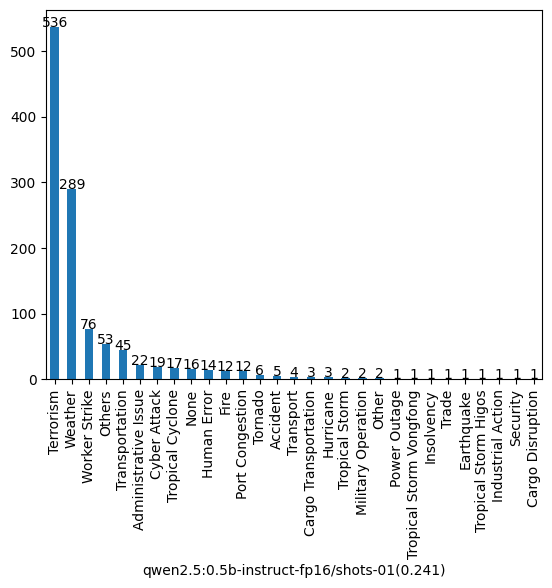

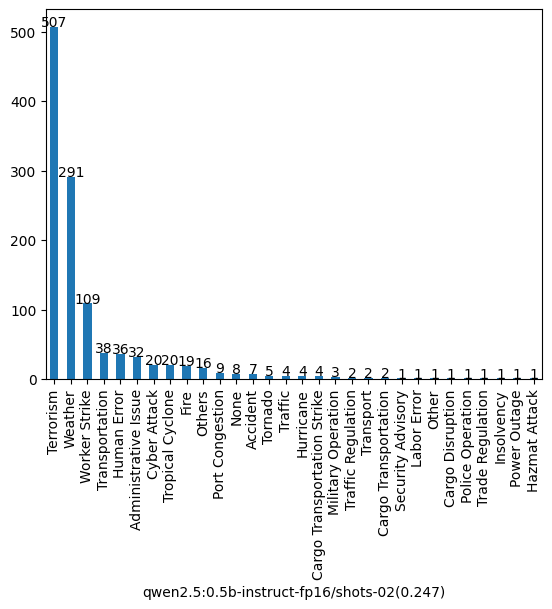

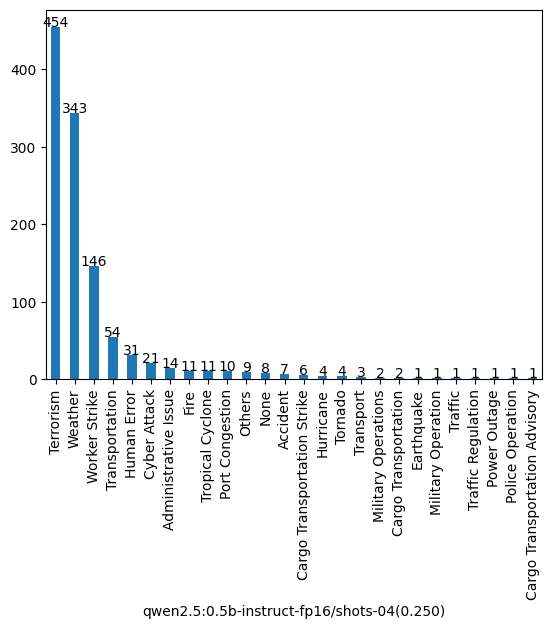

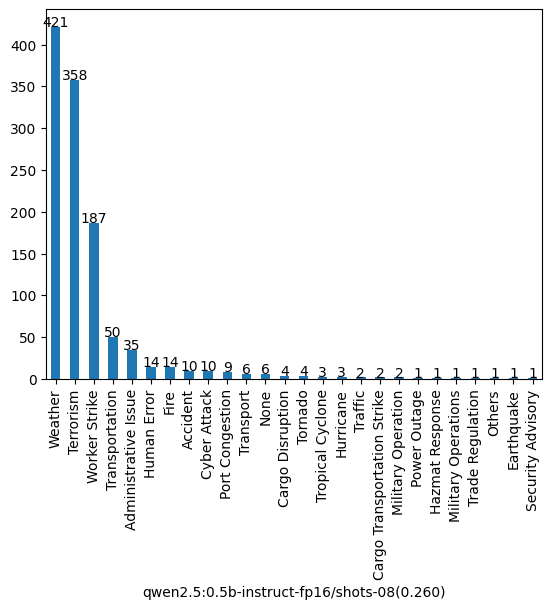

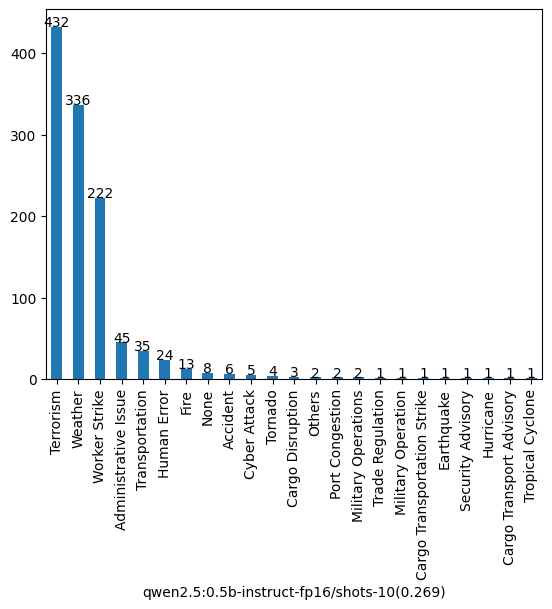

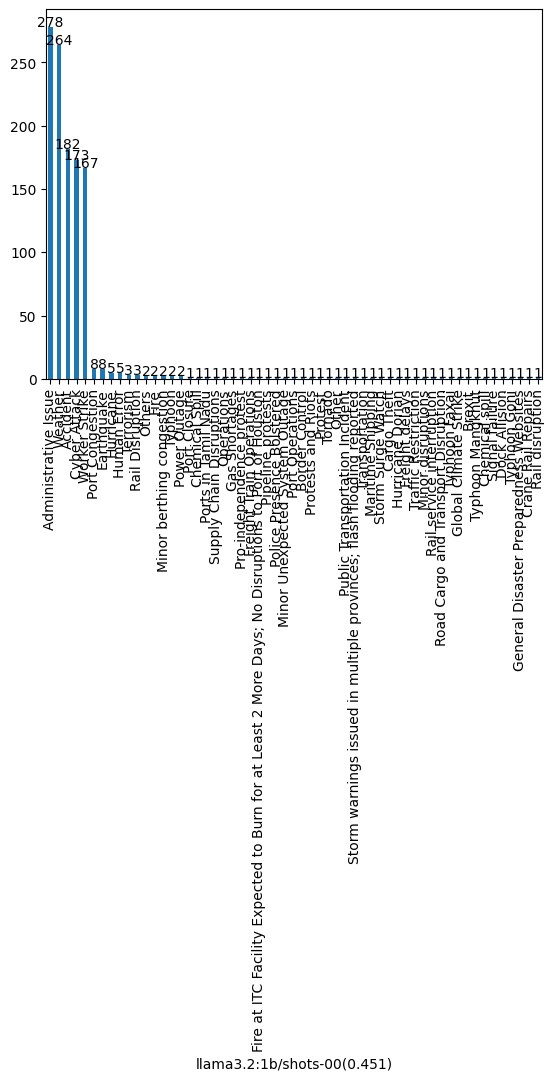

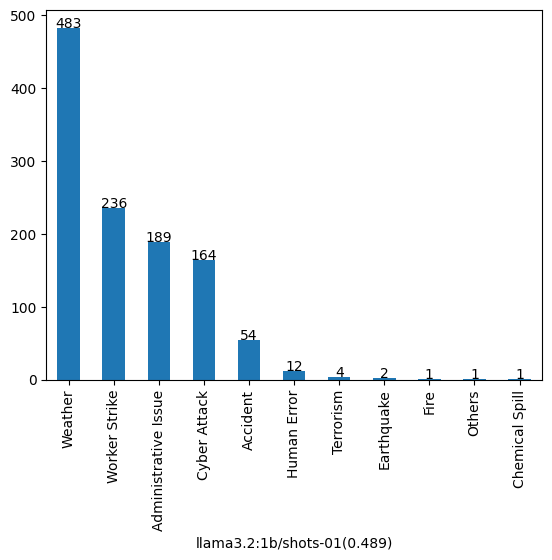

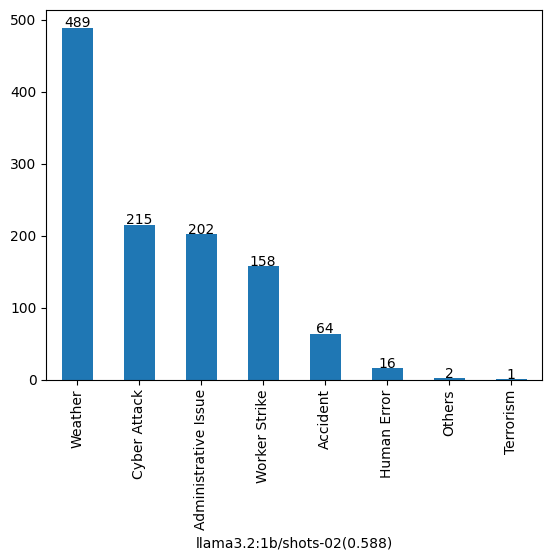

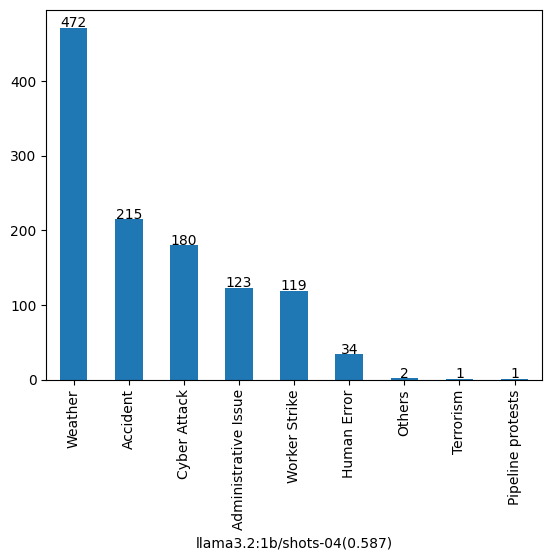

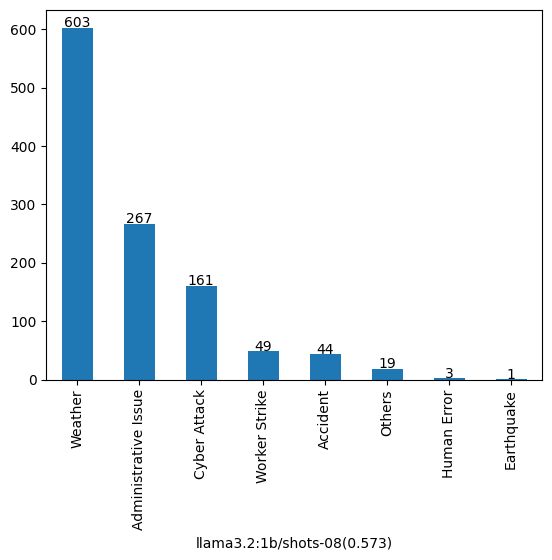

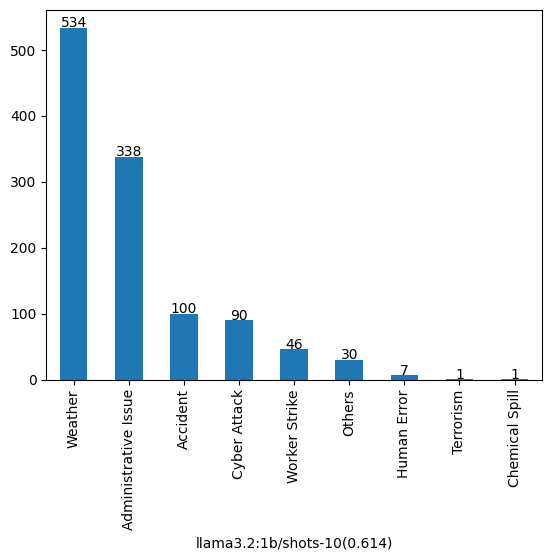

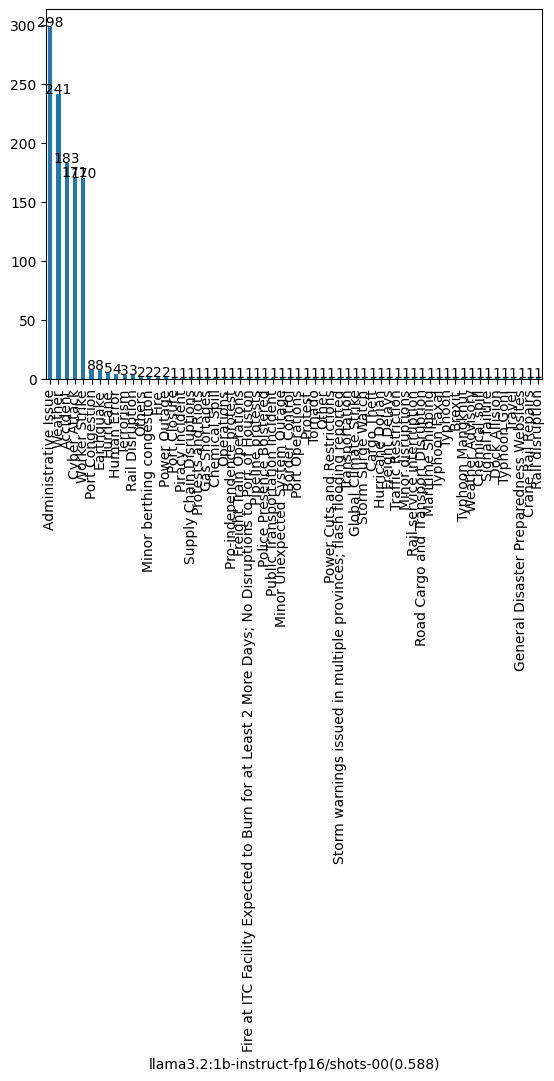

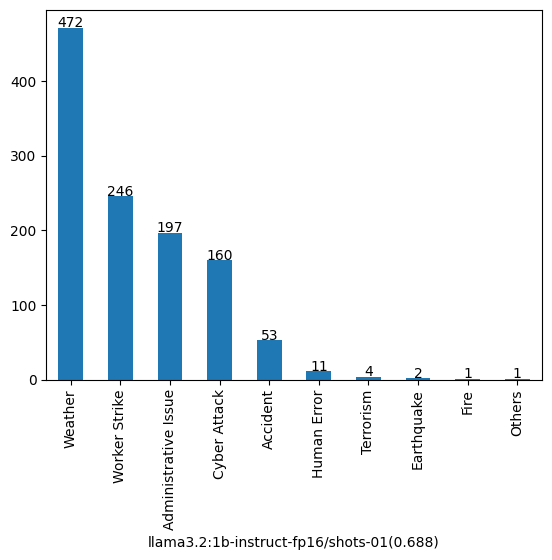

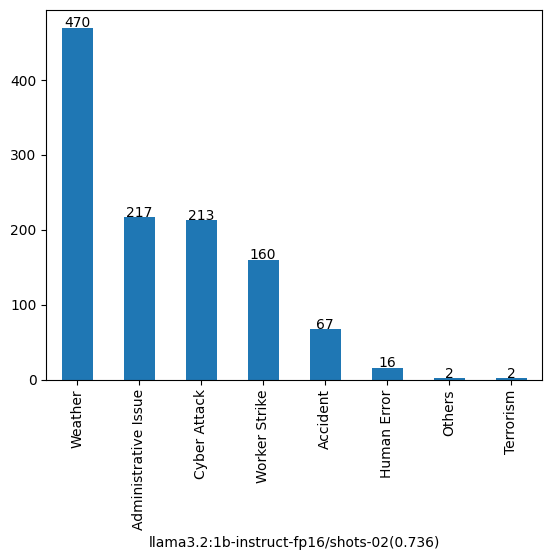

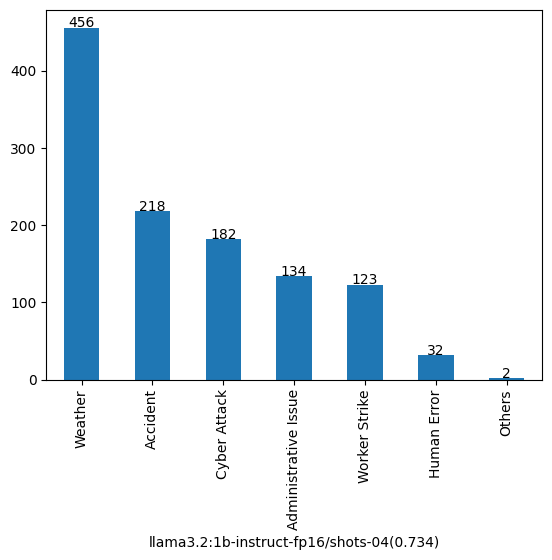

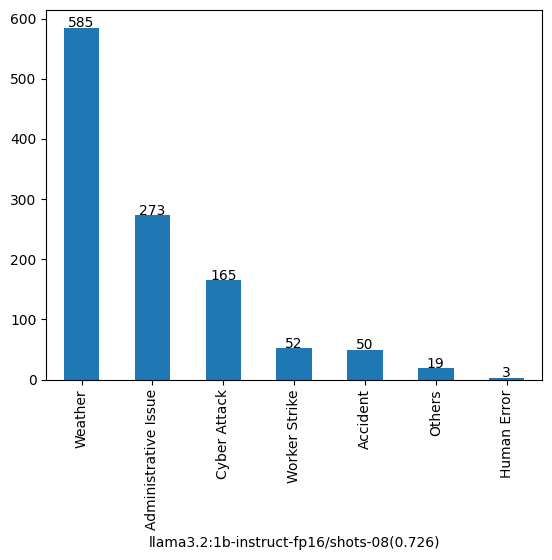

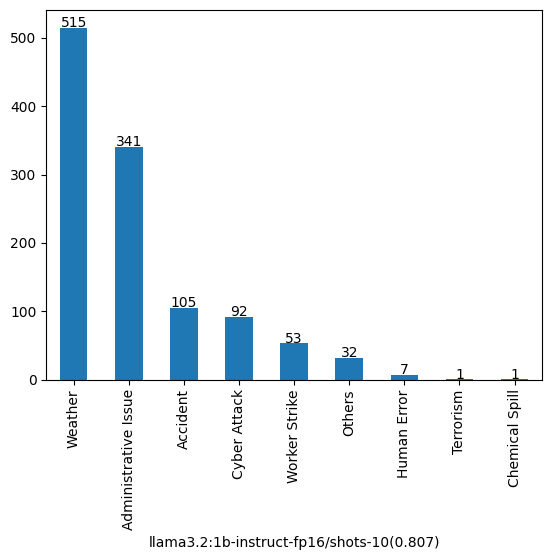

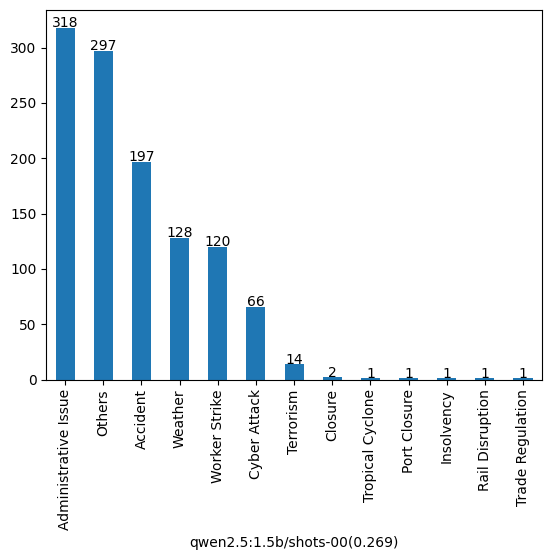

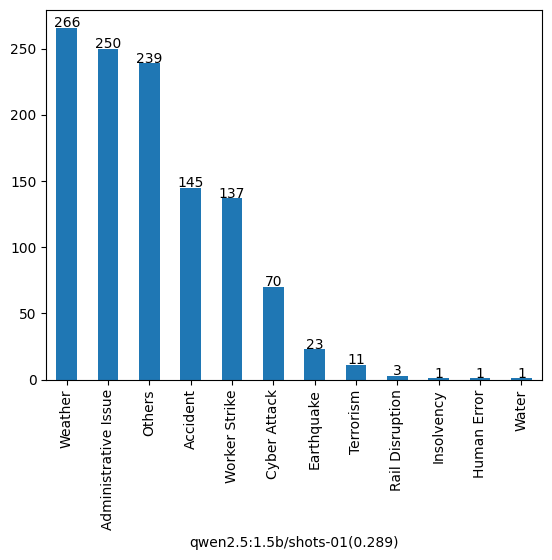

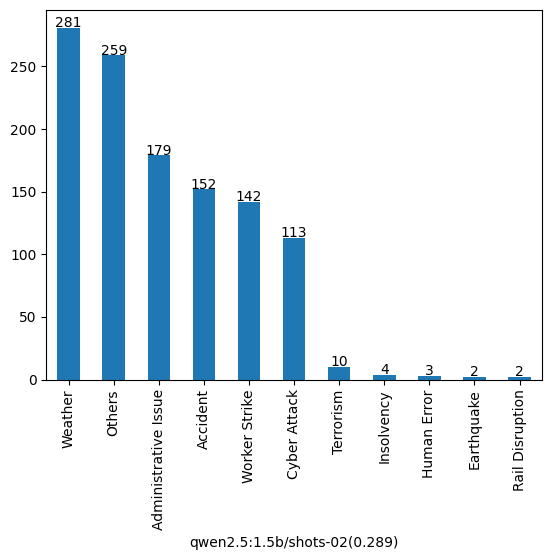

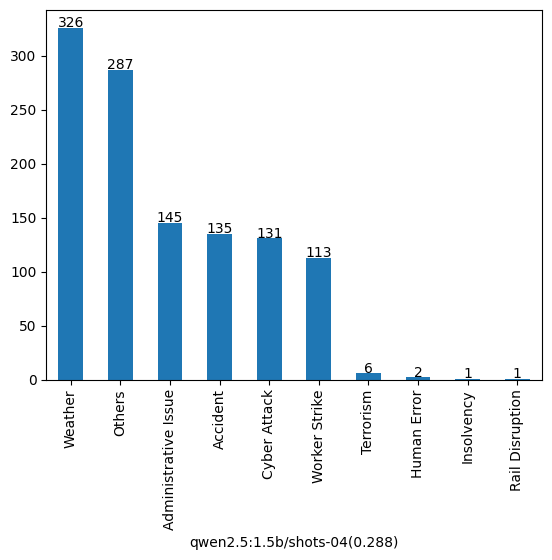

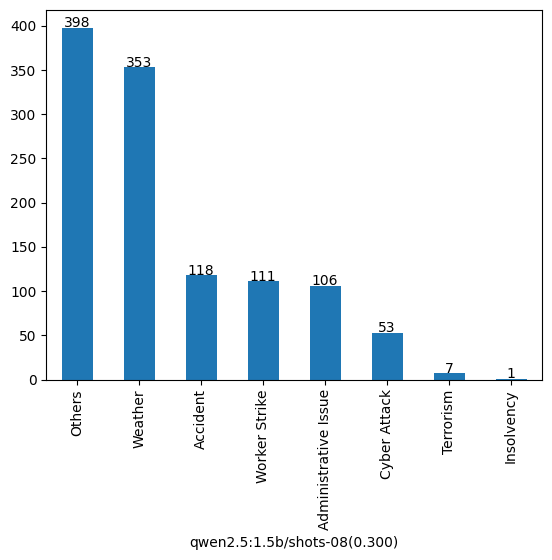

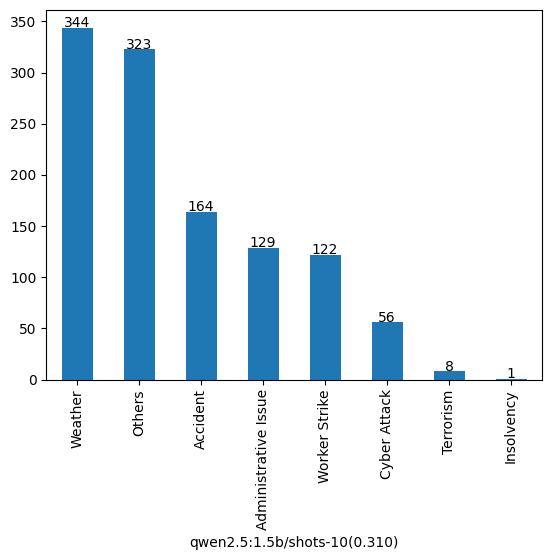

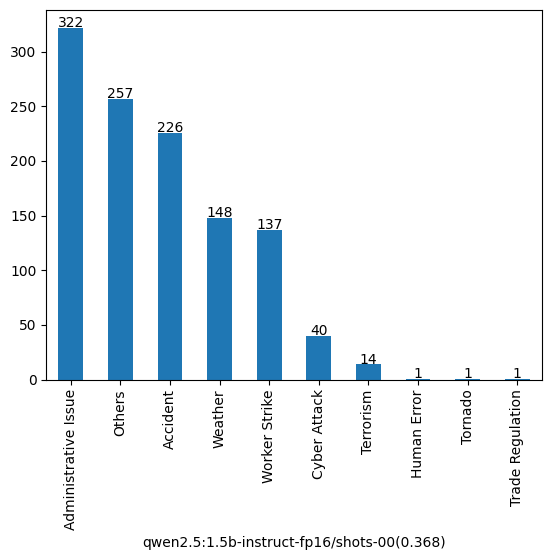

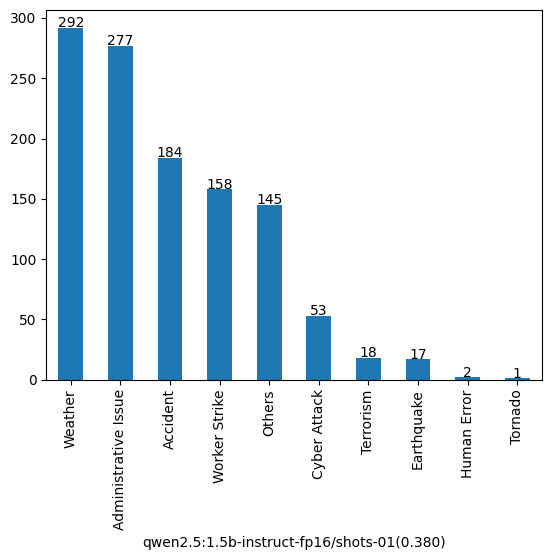

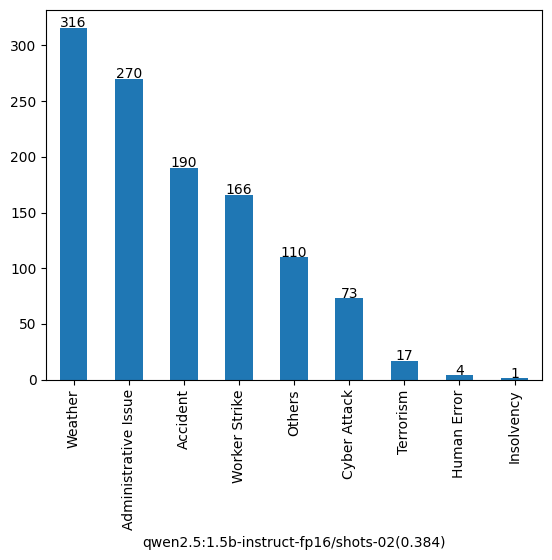

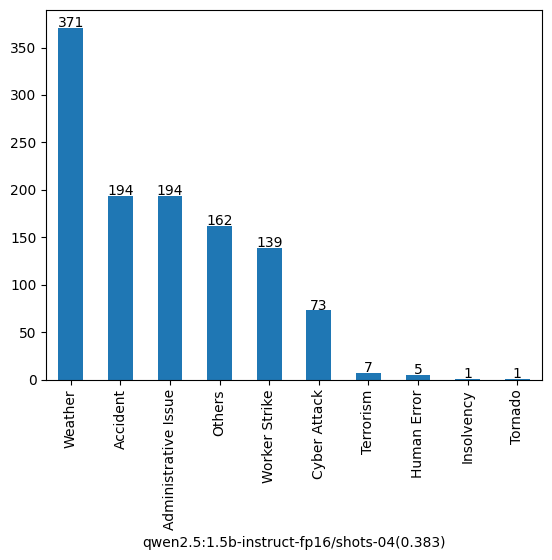

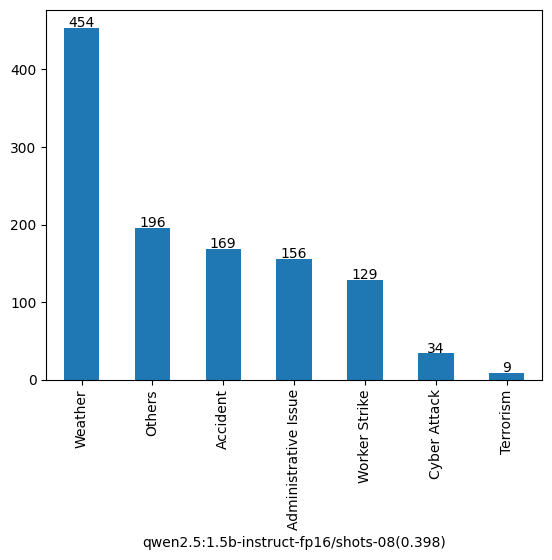

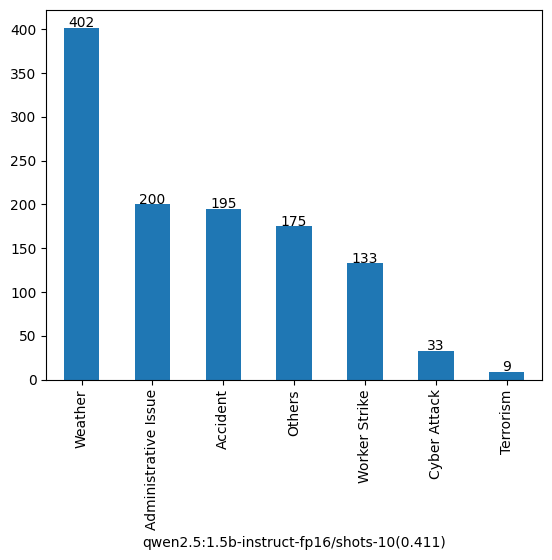

category not in json: {}


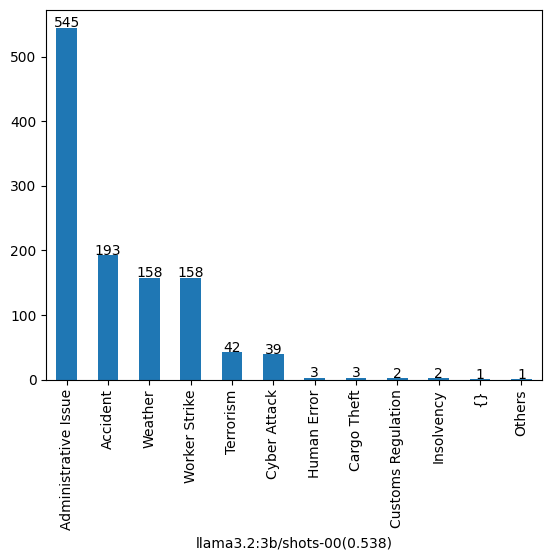

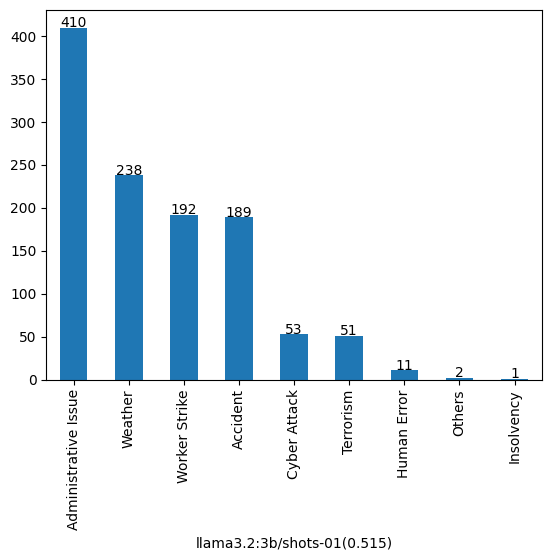

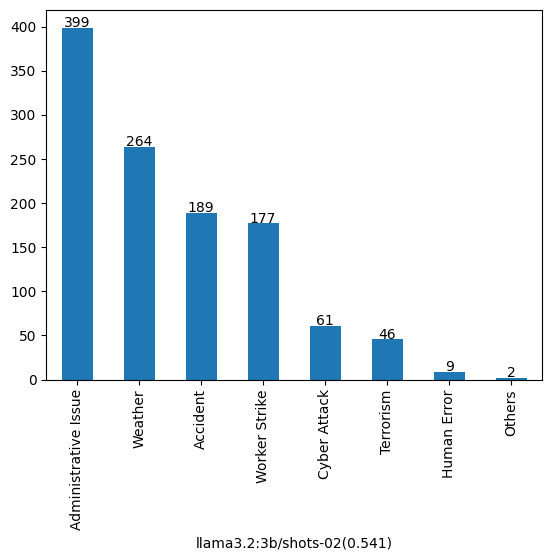

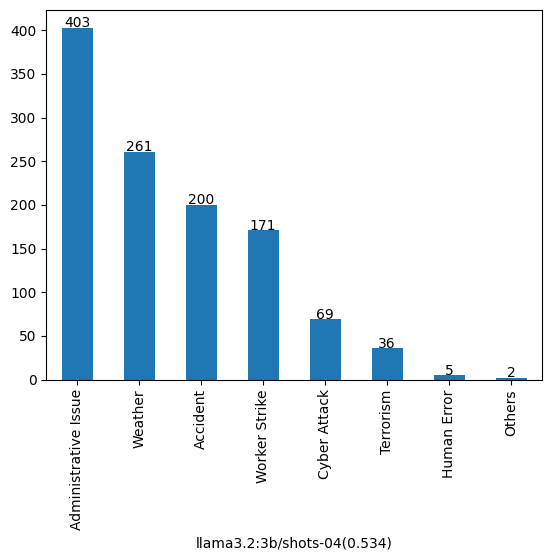

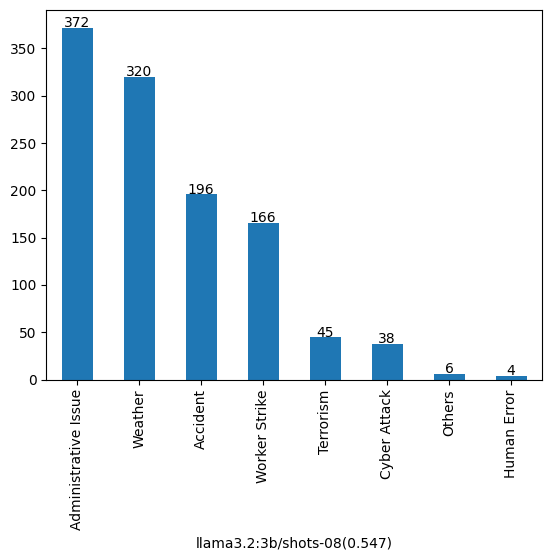

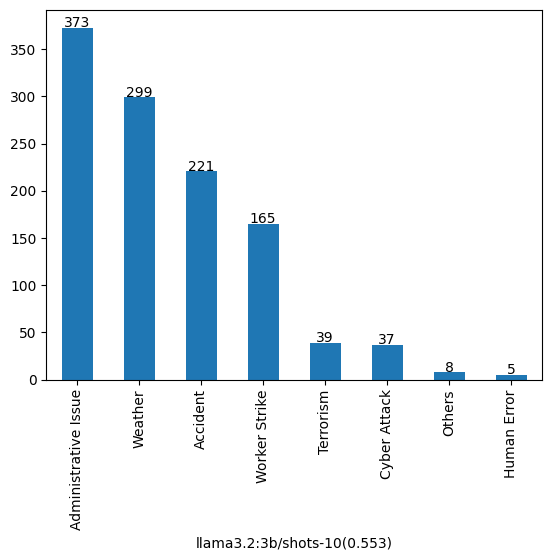

category not in json: {}


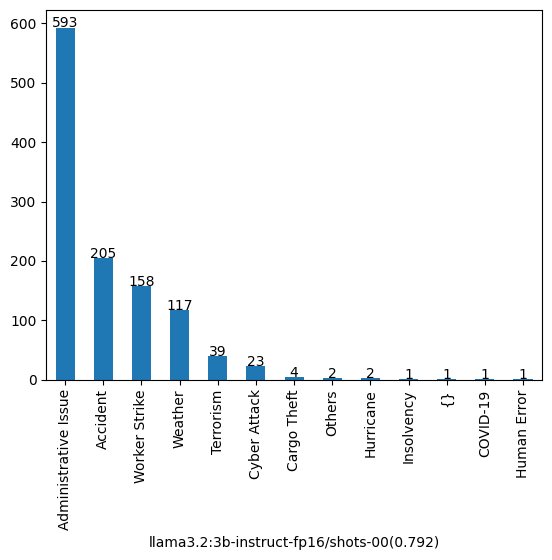

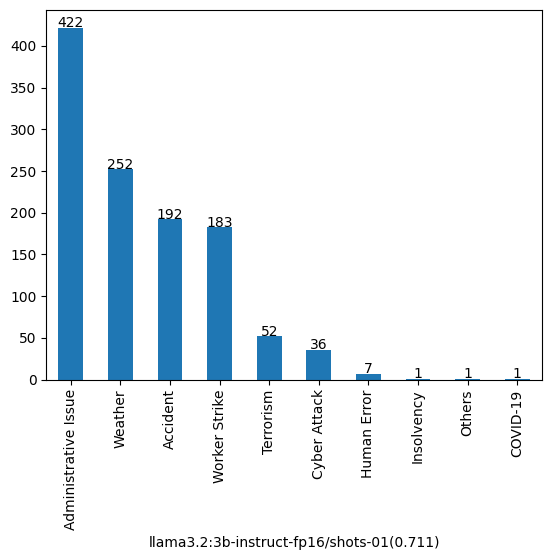

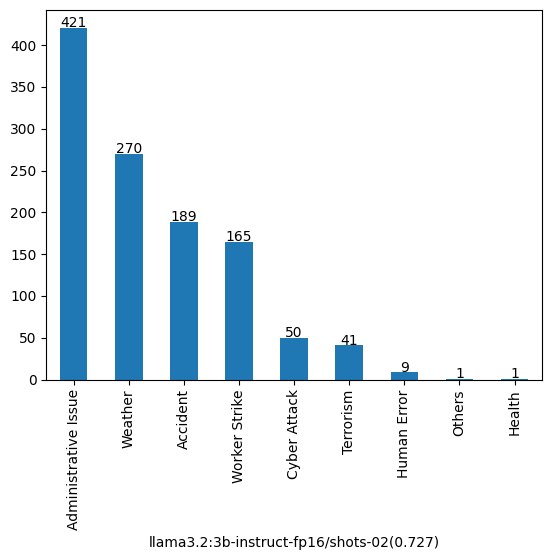

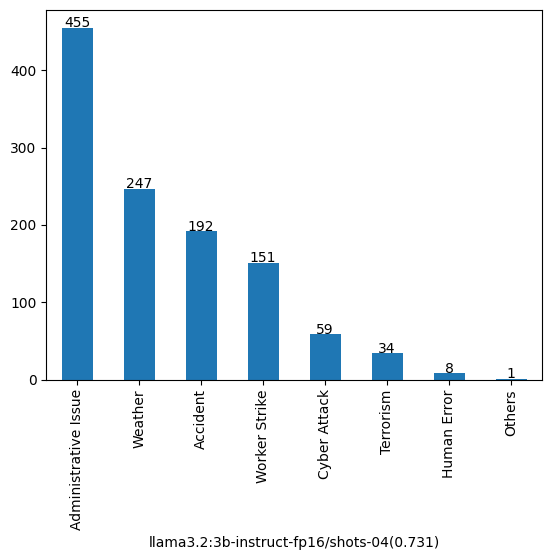

category not in json: {}


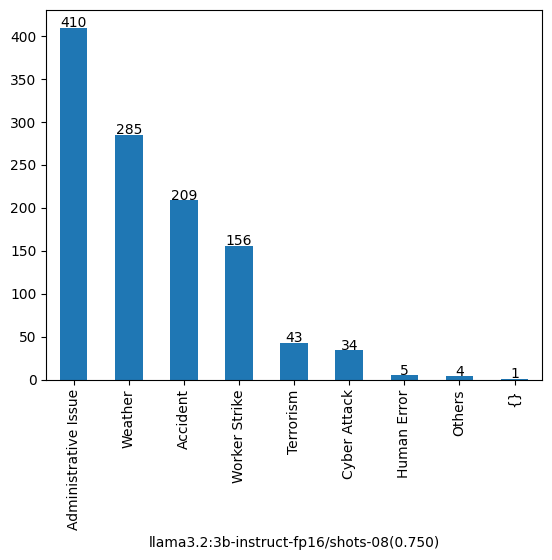

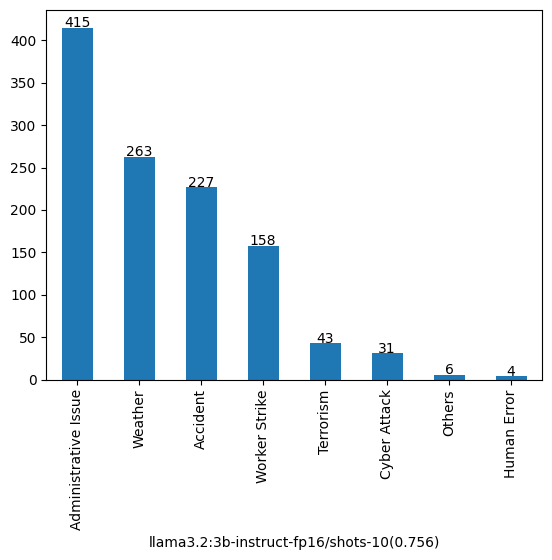

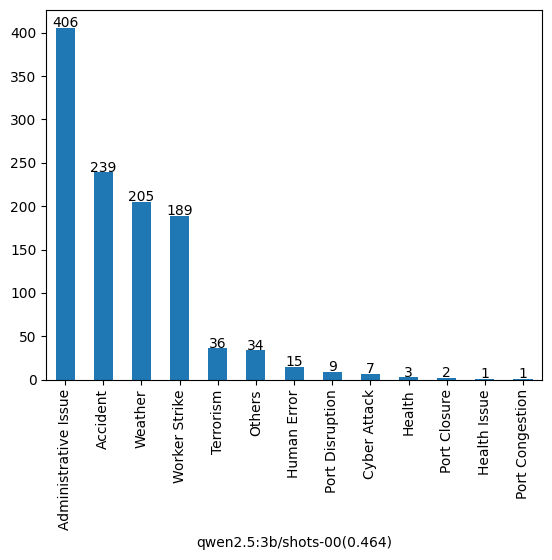

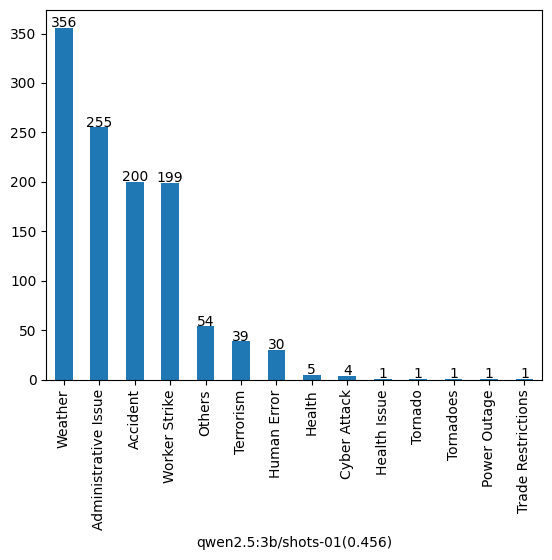

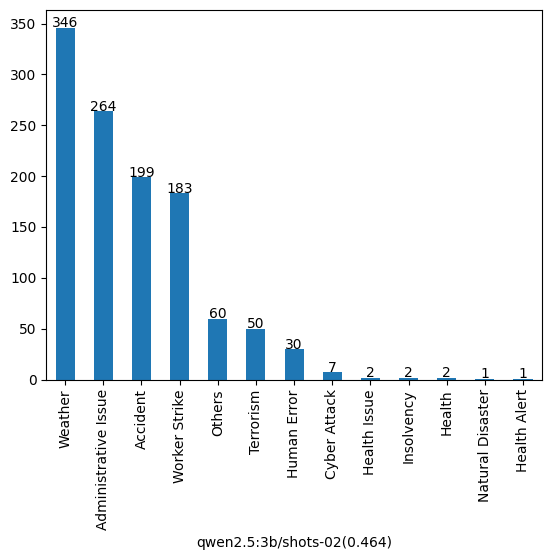

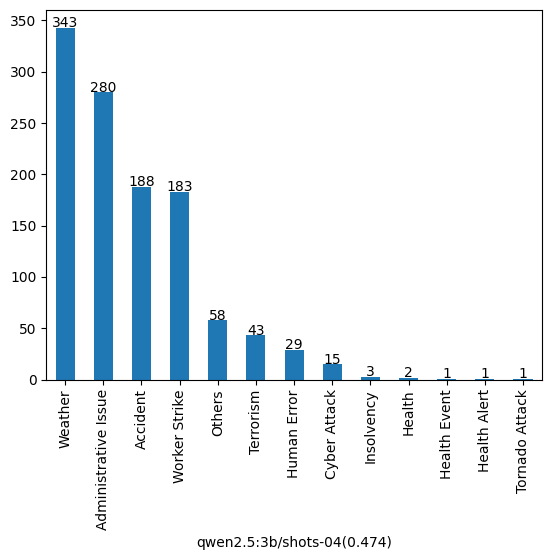

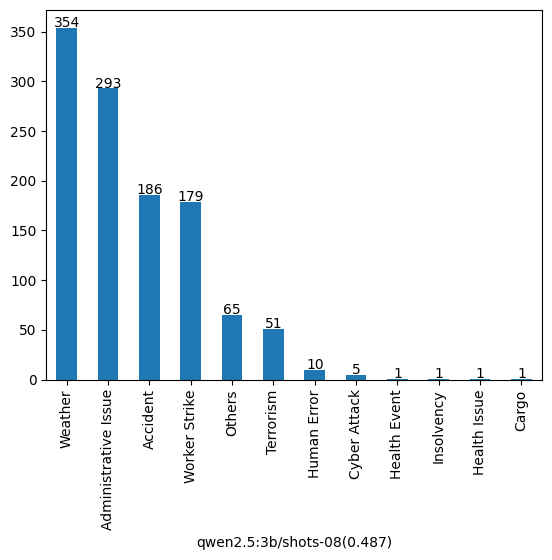

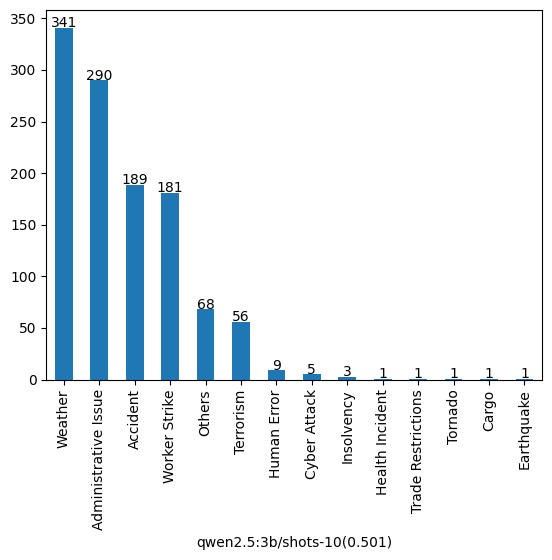

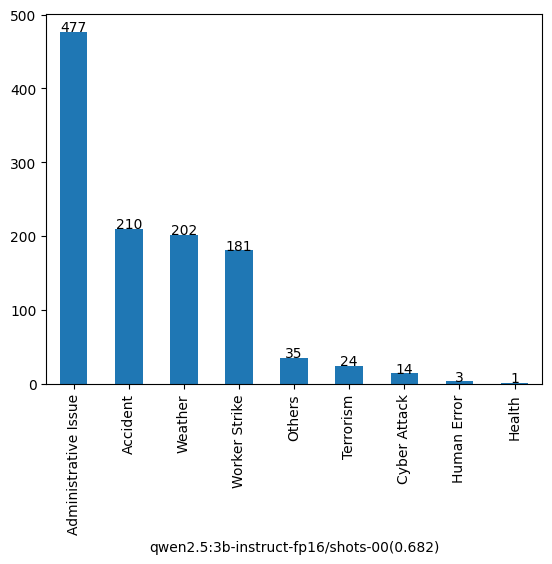

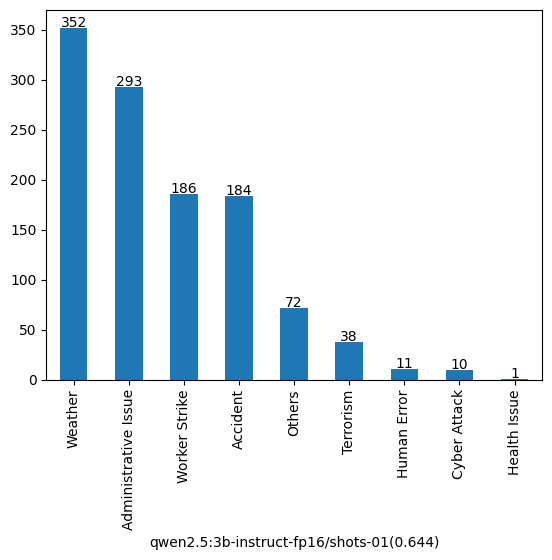

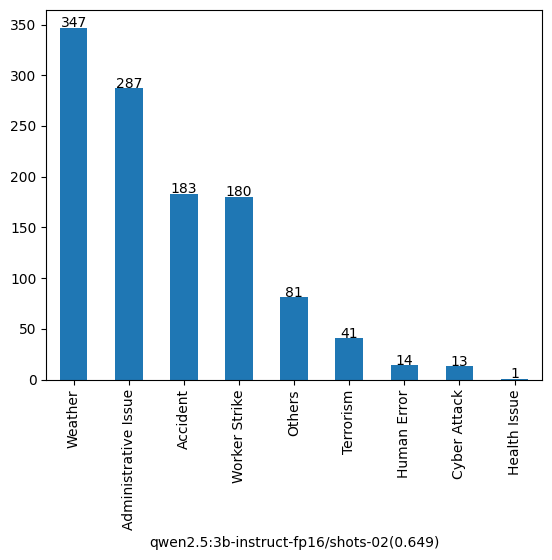

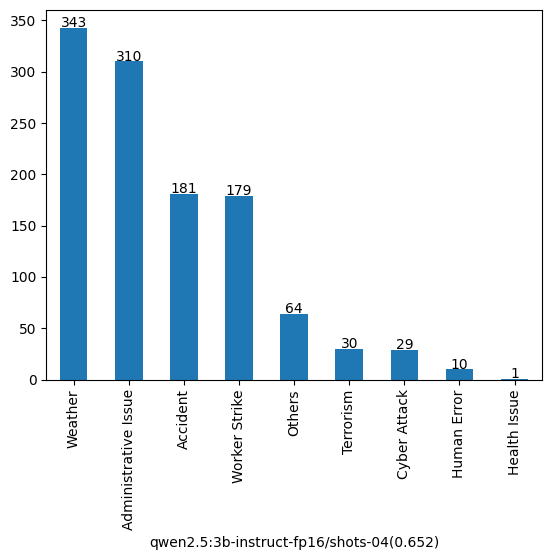

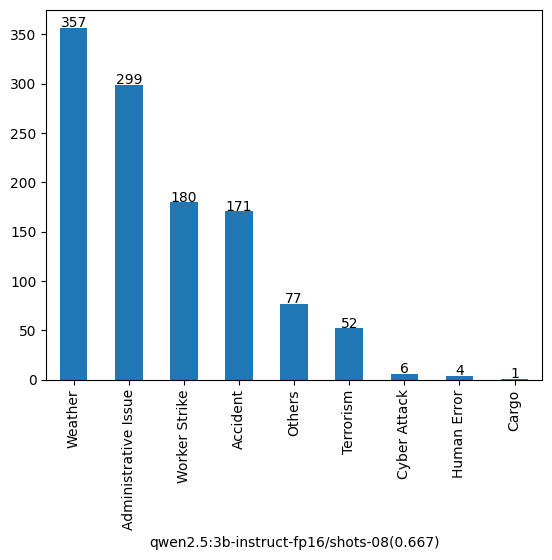

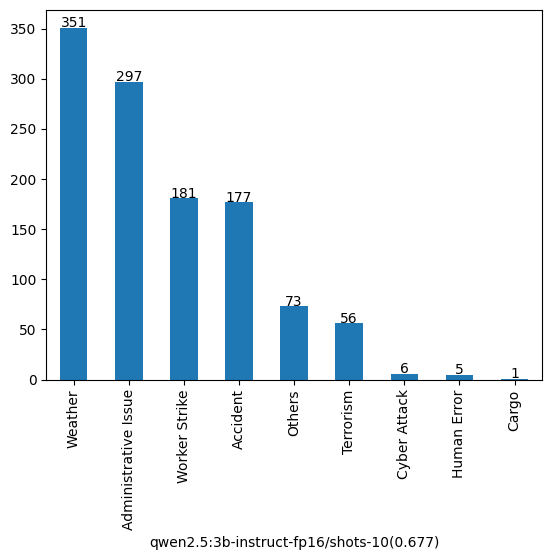

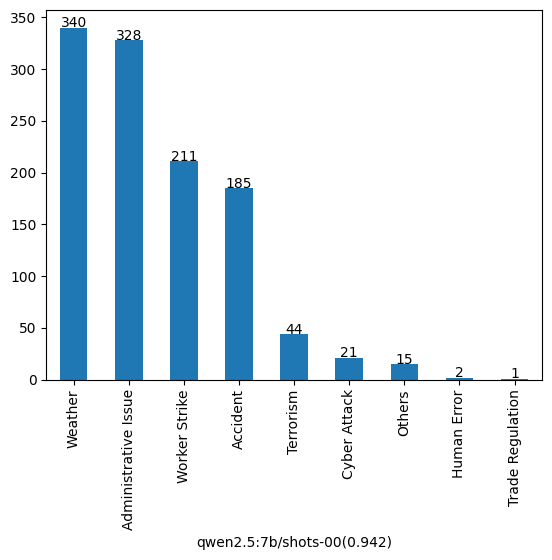

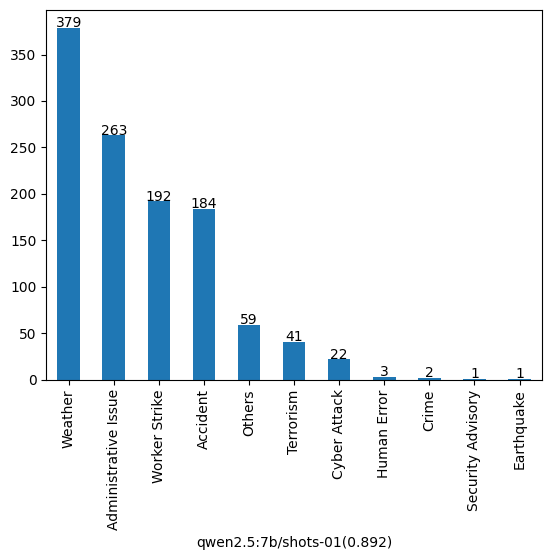

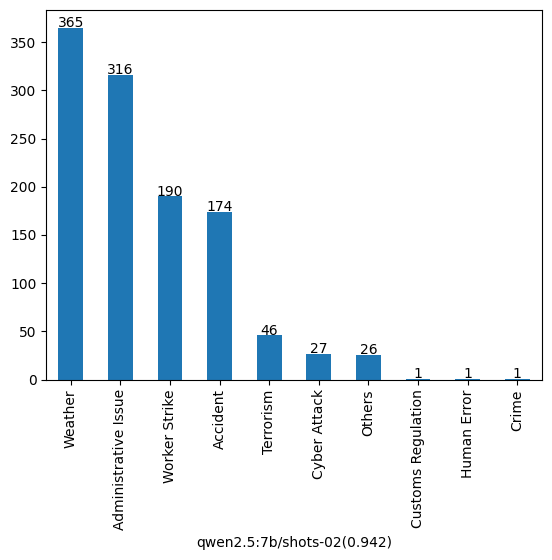

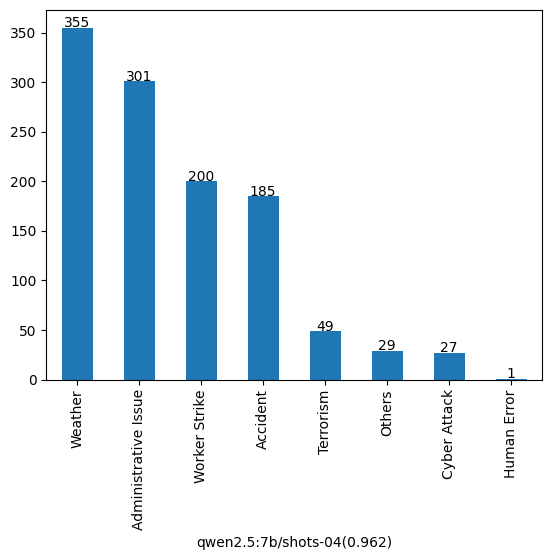

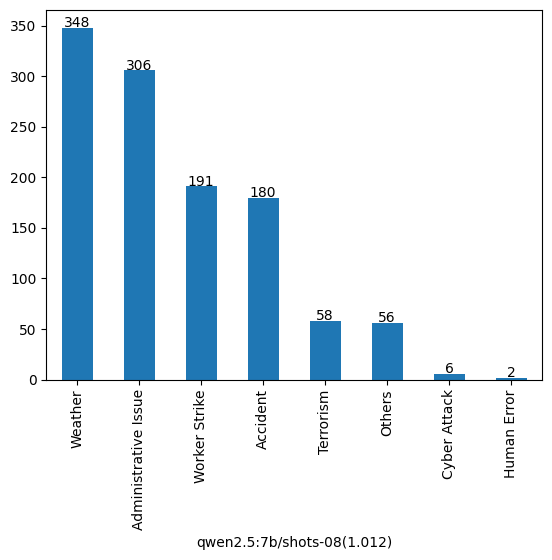

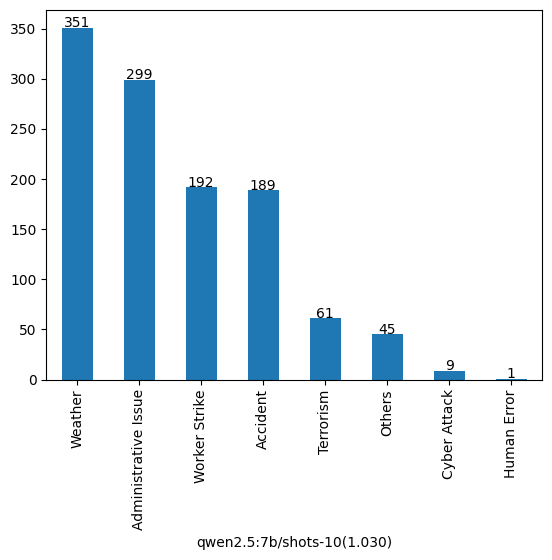

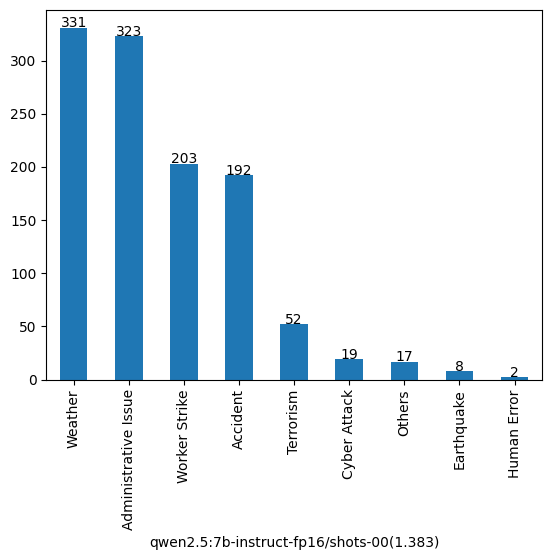

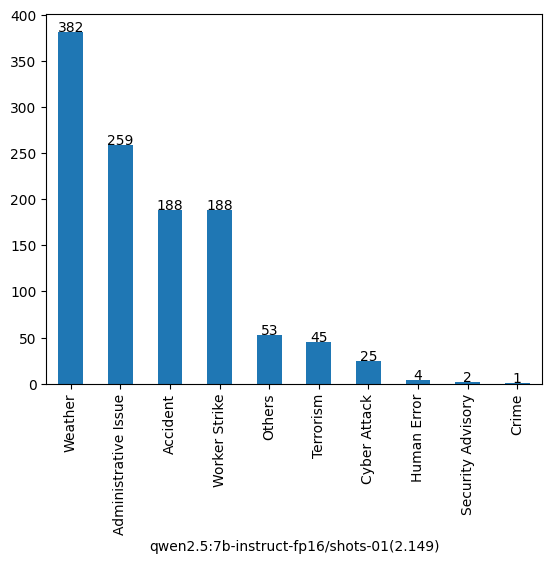

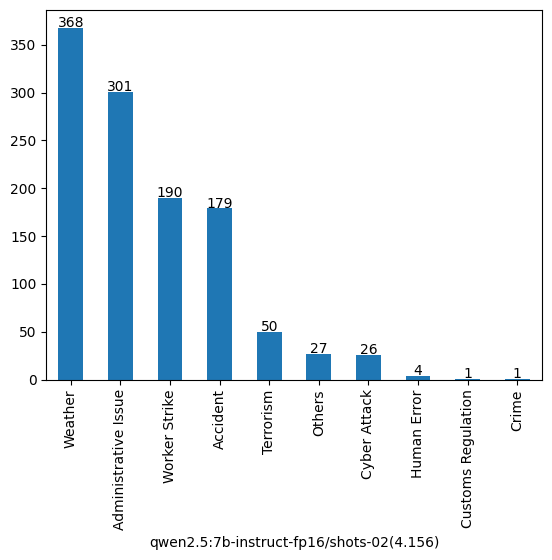

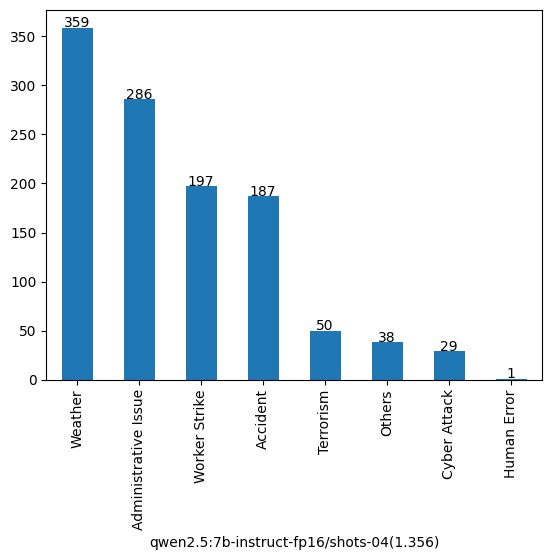

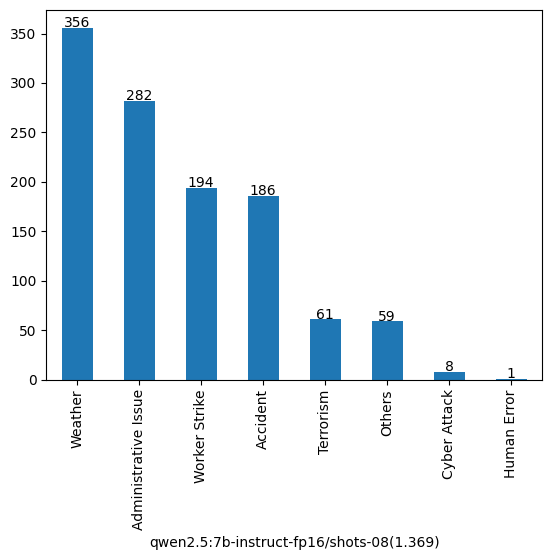

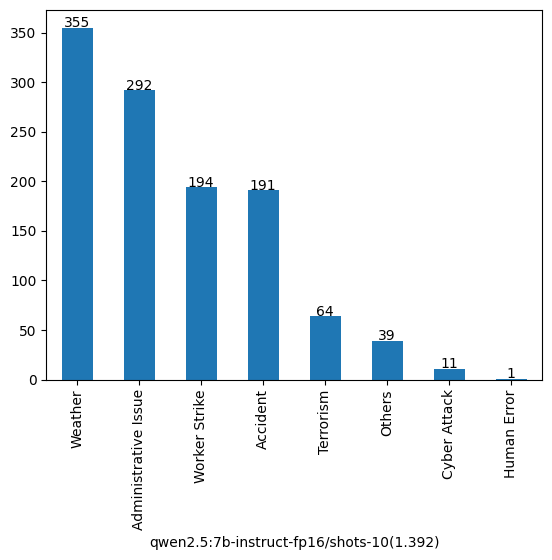

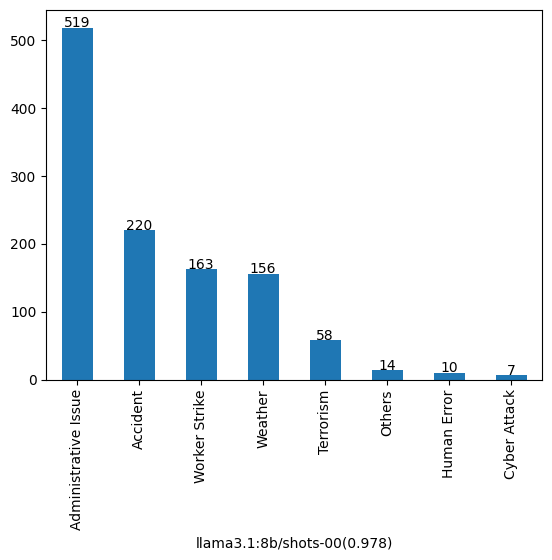

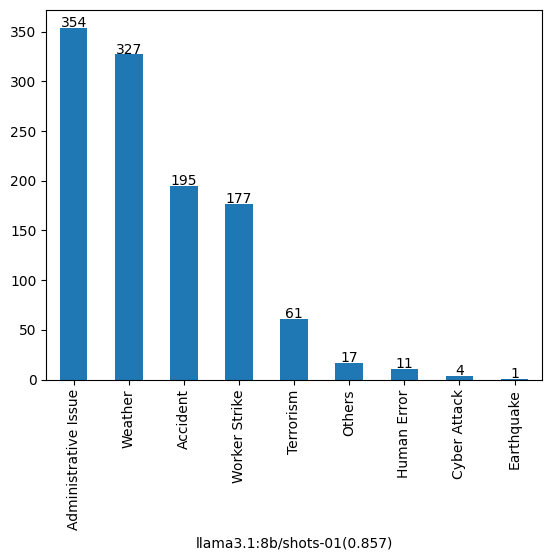

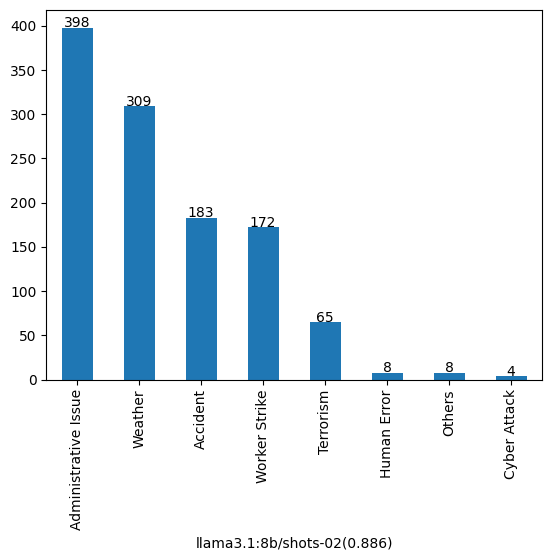

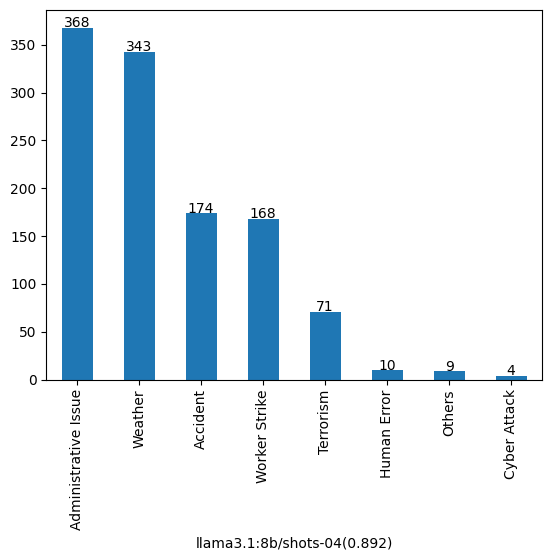

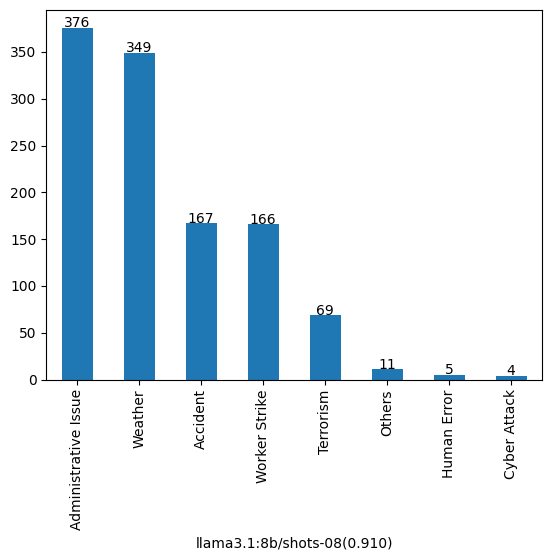

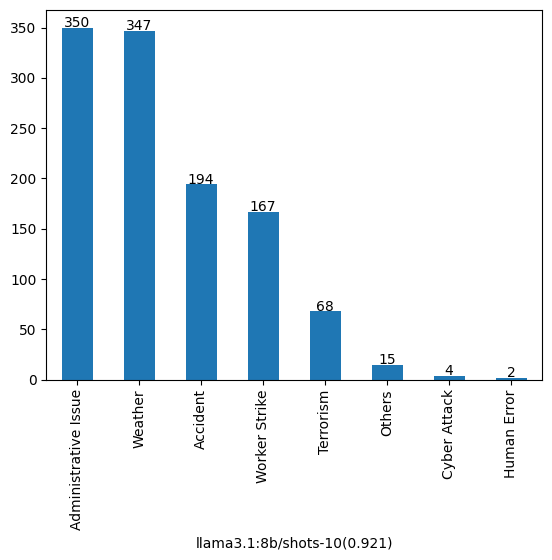

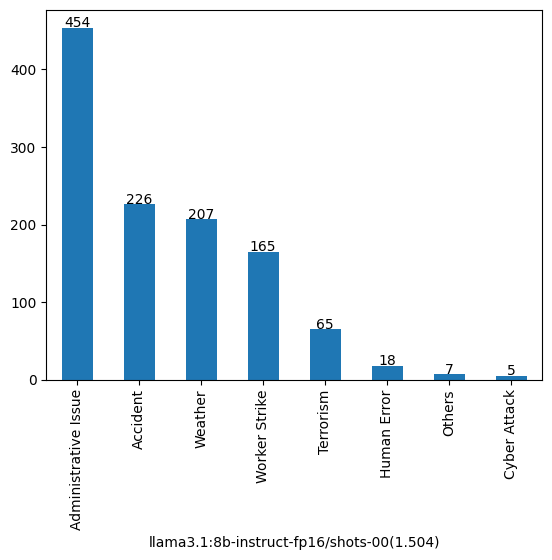

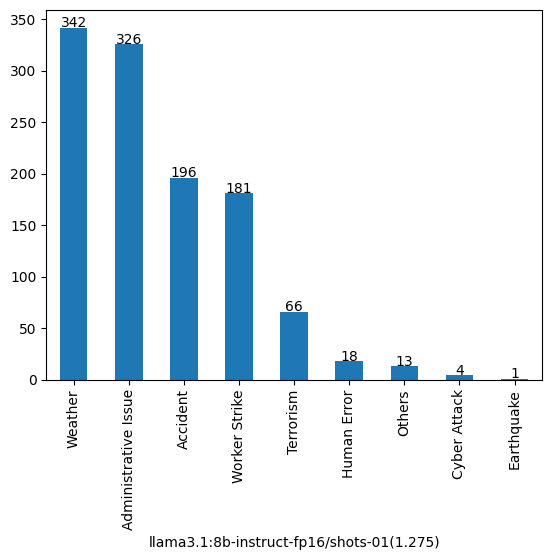

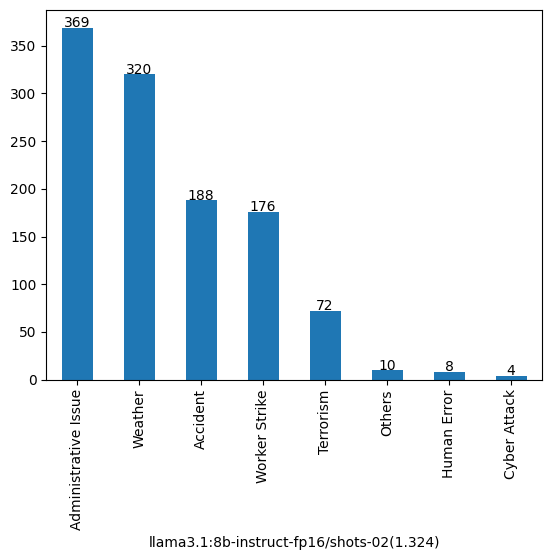

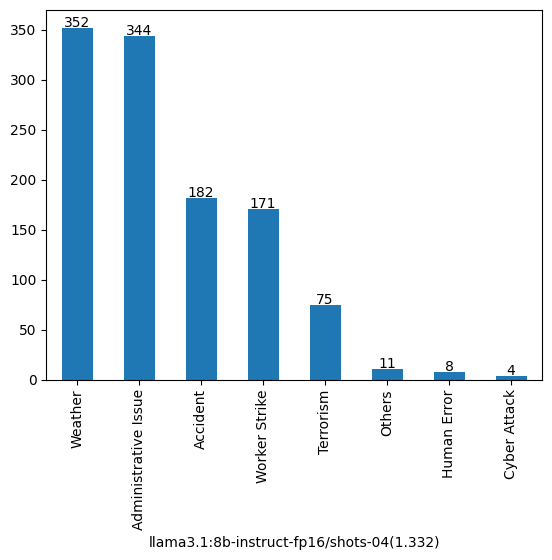

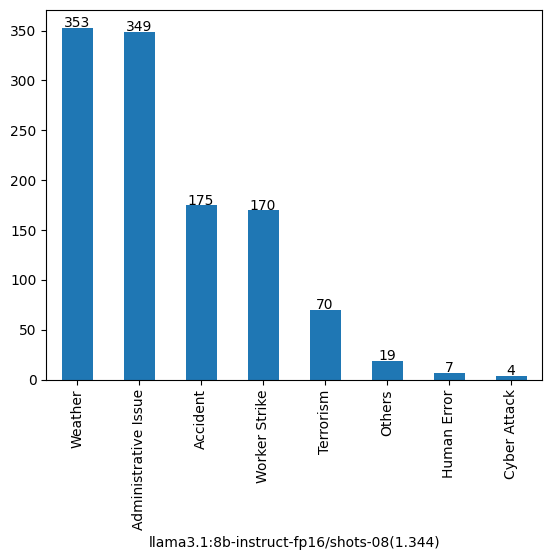

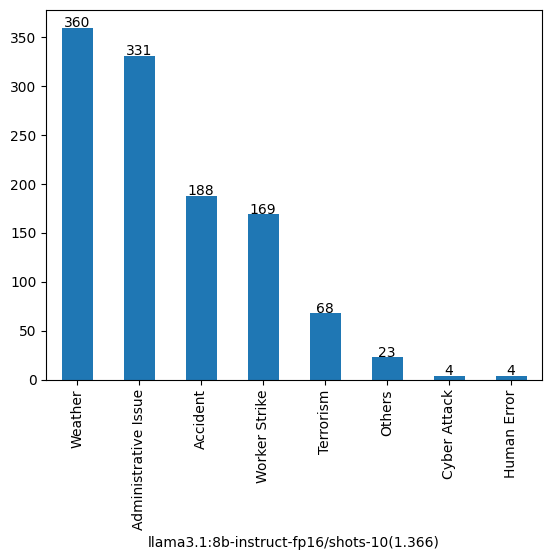

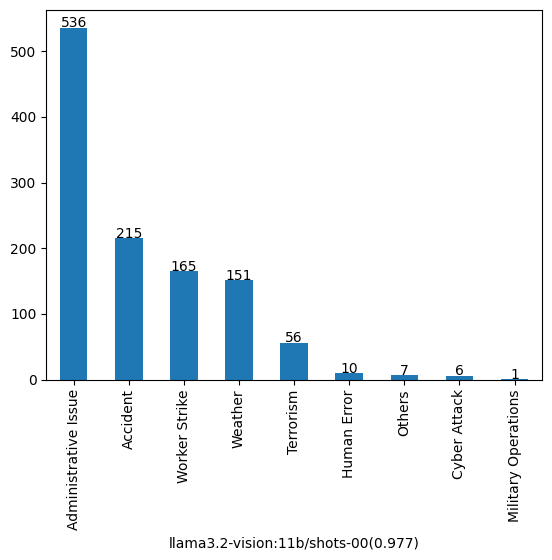

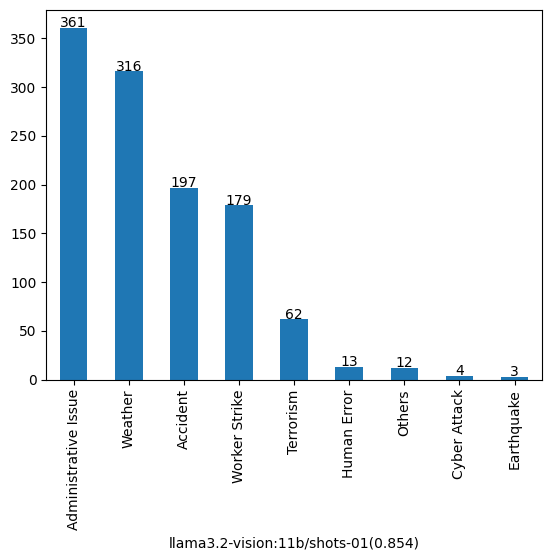

/Users/inflaton/code/engd/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py:836: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["backup"] = df[column_name]


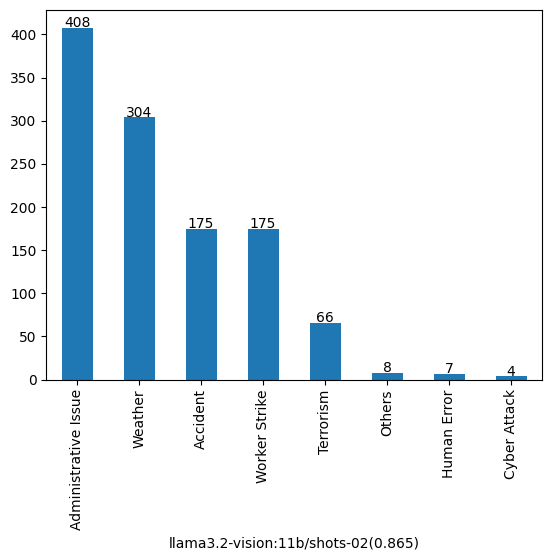

/Users/inflaton/code/engd/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py:836: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["backup"] = df[column_name]


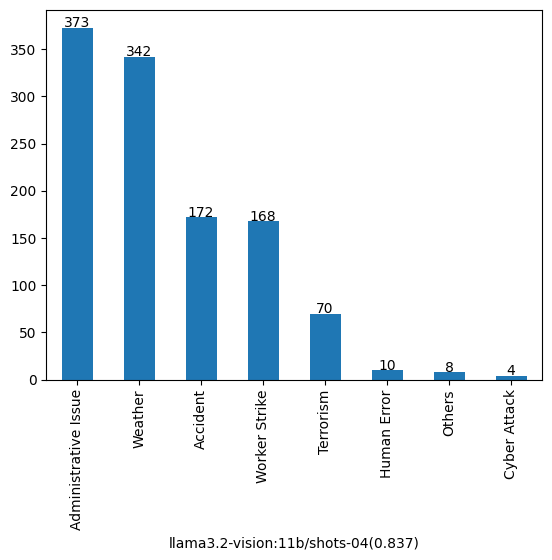

/Users/inflaton/code/engd/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py:836: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["backup"] = df[column_name]


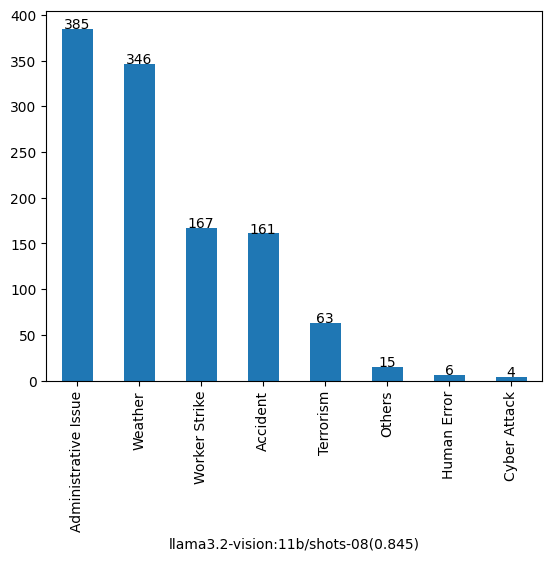

/Users/inflaton/code/engd/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py:836: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["backup"] = df[column_name]


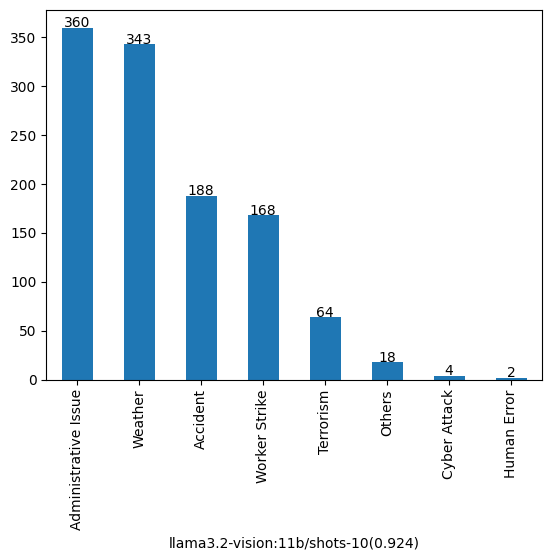

/Users/inflaton/code/engd/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py:836: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["backup"] = df[column_name]


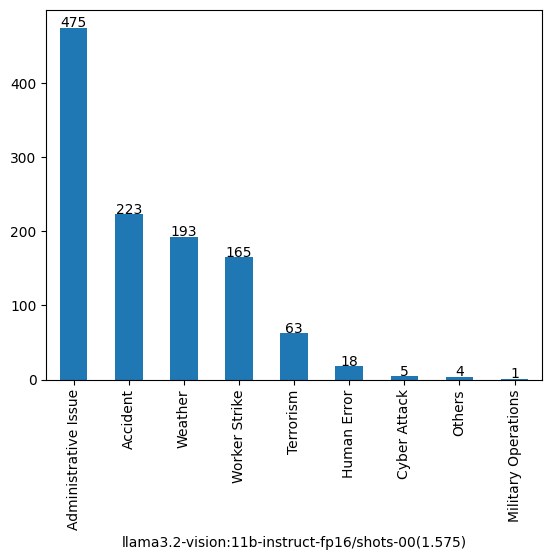

/Users/inflaton/code/engd/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py:836: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["backup"] = df[column_name]


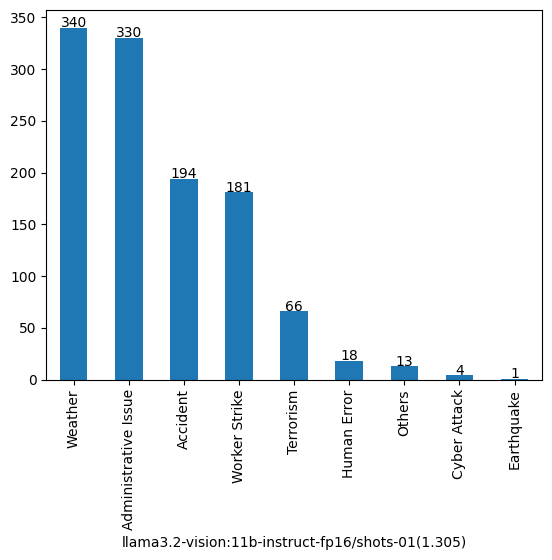

/Users/inflaton/code/engd/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py:836: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["backup"] = df[column_name]


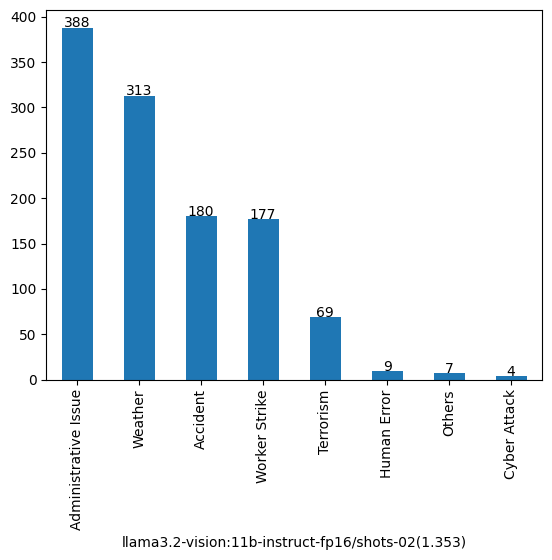

/Users/inflaton/code/engd/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py:836: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["backup"] = df[column_name]


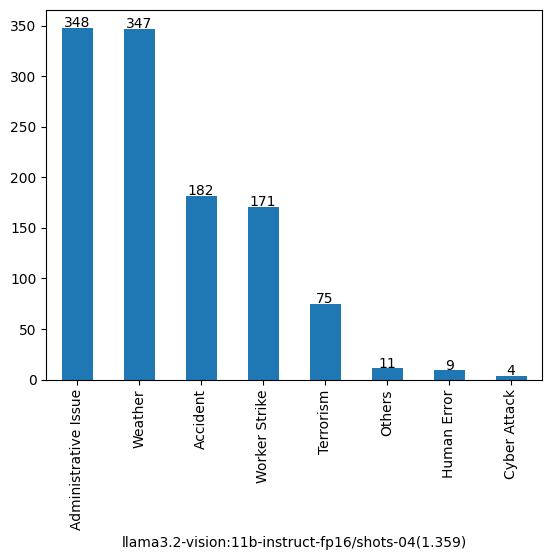

/Users/inflaton/code/engd/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py:836: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["backup"] = df[column_name]


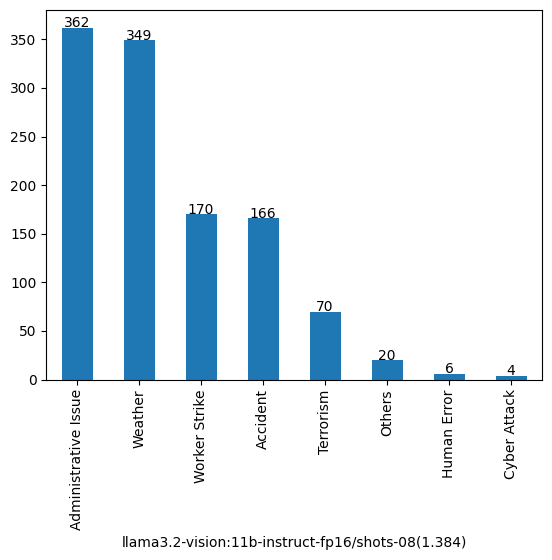

/Users/inflaton/code/engd/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py:836: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["backup"] = df[column_name]


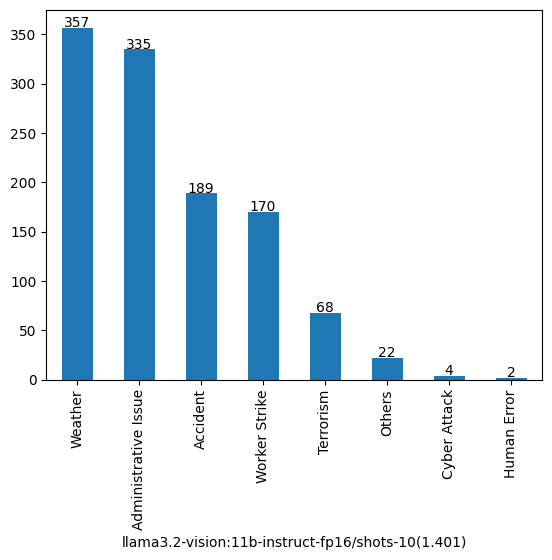

/Users/inflaton/code/engd/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py:836: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["backup"] = df[column_name]


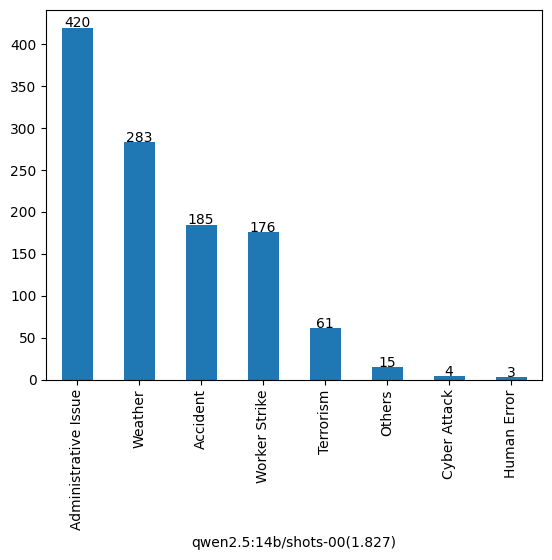

/Users/inflaton/code/engd/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py:836: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["backup"] = df[column_name]


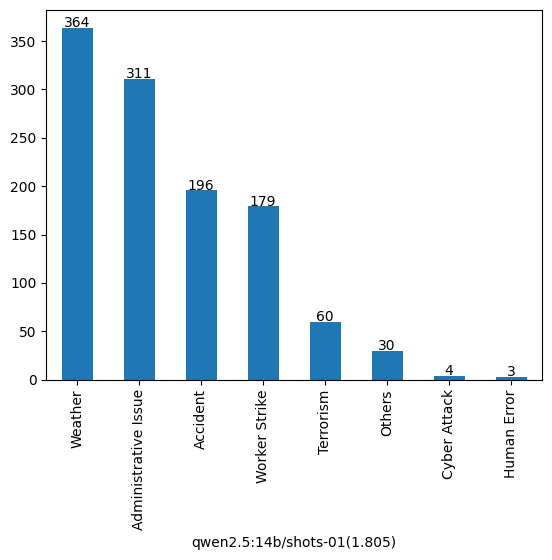

/Users/inflaton/code/engd/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py:836: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["backup"] = df[column_name]


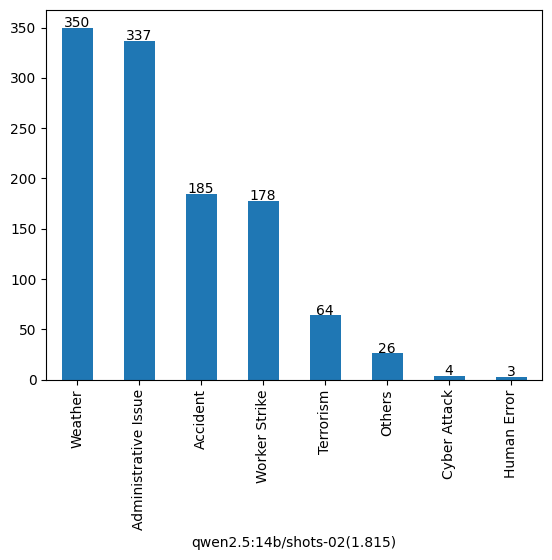

/Users/inflaton/code/engd/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py:836: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["backup"] = df[column_name]


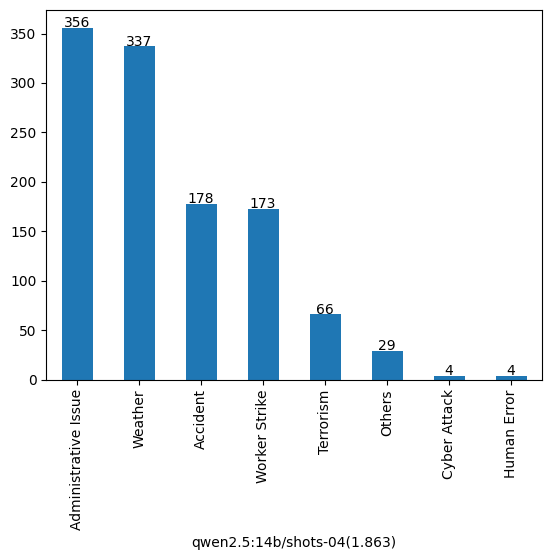

/Users/inflaton/code/engd/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py:836: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["backup"] = df[column_name]


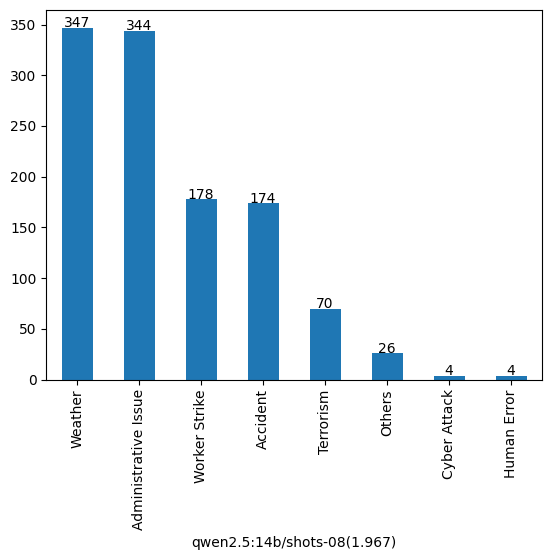

/Users/inflaton/code/engd/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py:836: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["backup"] = df[column_name]


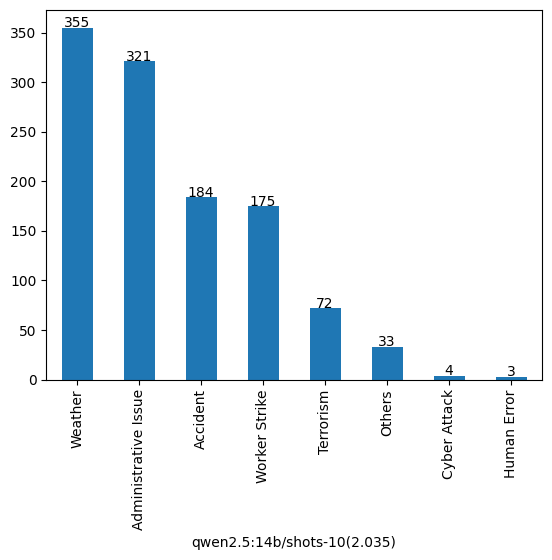

/Users/inflaton/code/engd/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py:836: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["backup"] = df[column_name]


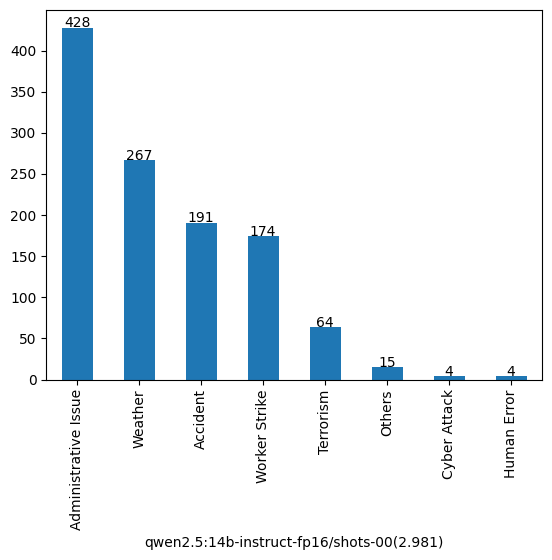

/Users/inflaton/code/engd/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py:836: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["backup"] = df[column_name]


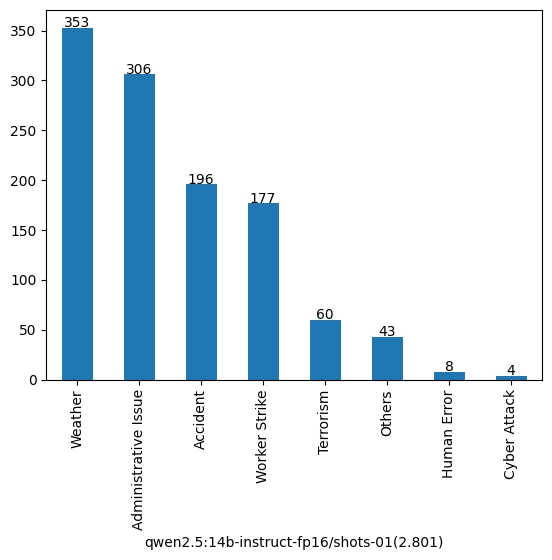

/Users/inflaton/code/engd/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py:836: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["backup"] = df[column_name]


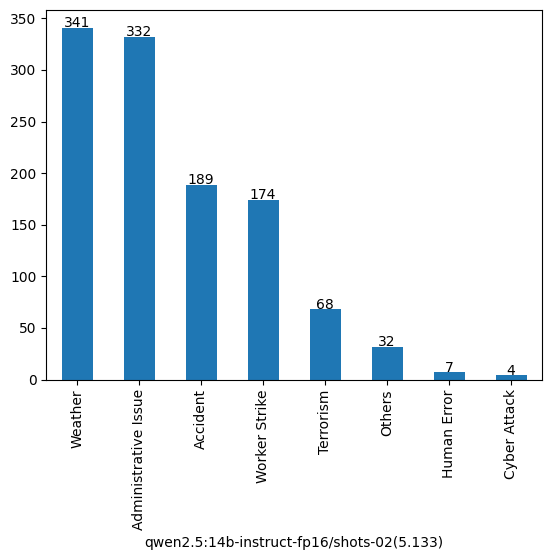

/Users/inflaton/code/engd/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py:836: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["backup"] = df[column_name]


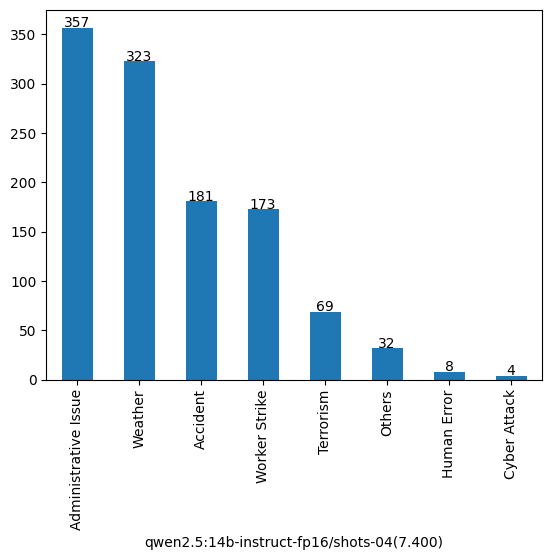

/Users/inflaton/code/engd/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py:836: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["backup"] = df[column_name]


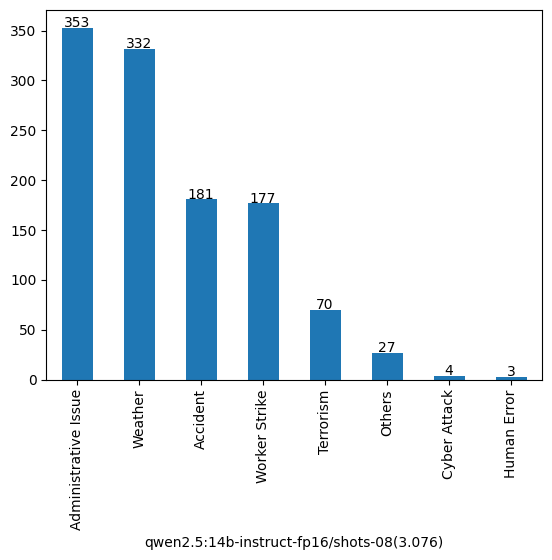

/Users/inflaton/code/engd/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py:836: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["backup"] = df[column_name]


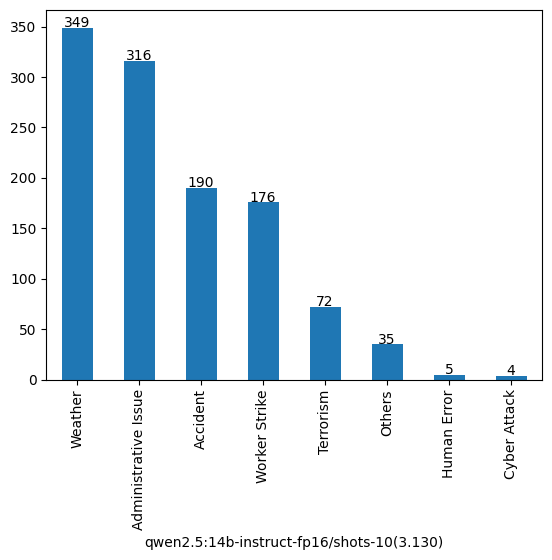

/Users/inflaton/code/engd/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py:836: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["backup"] = df[column_name]


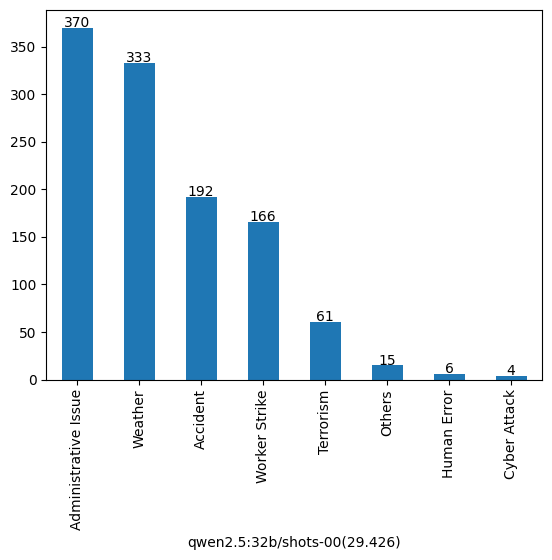

/Users/inflaton/code/engd/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py:836: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["backup"] = df[column_name]


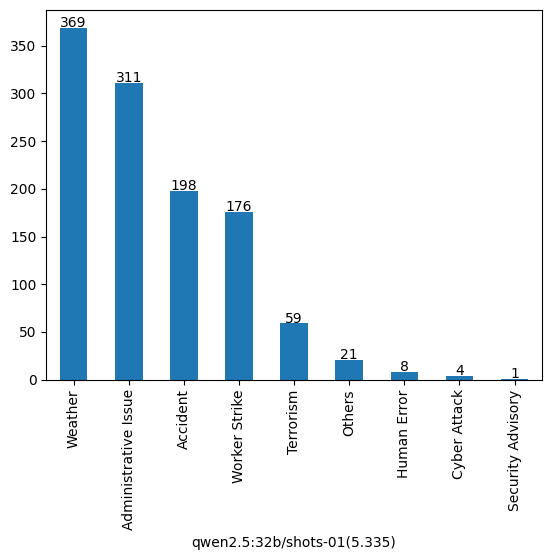

/Users/inflaton/code/engd/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py:836: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["backup"] = df[column_name]


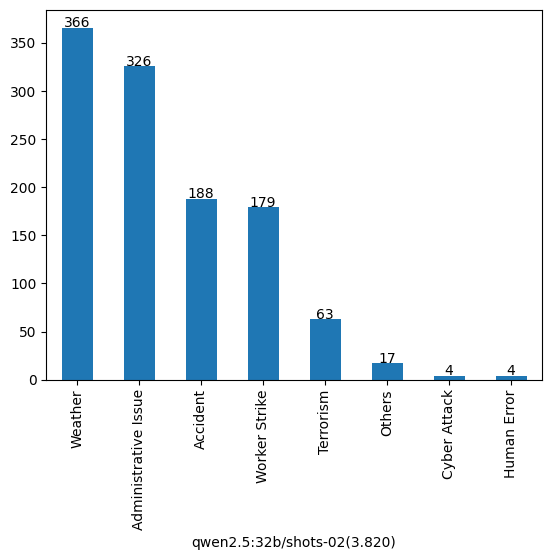

/Users/inflaton/code/engd/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py:836: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["backup"] = df[column_name]


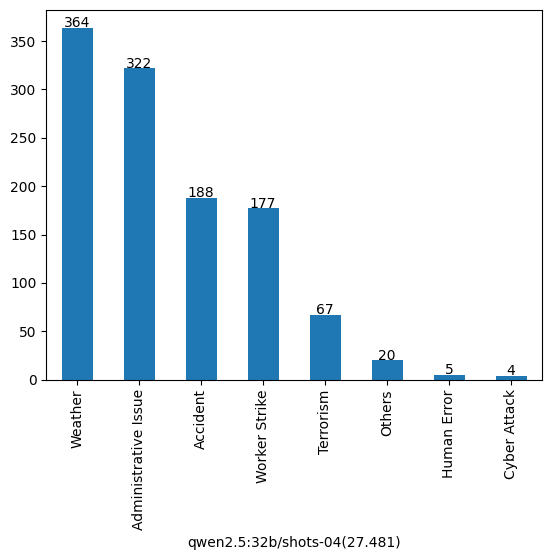

/Users/inflaton/code/engd/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py:836: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["backup"] = df[column_name]


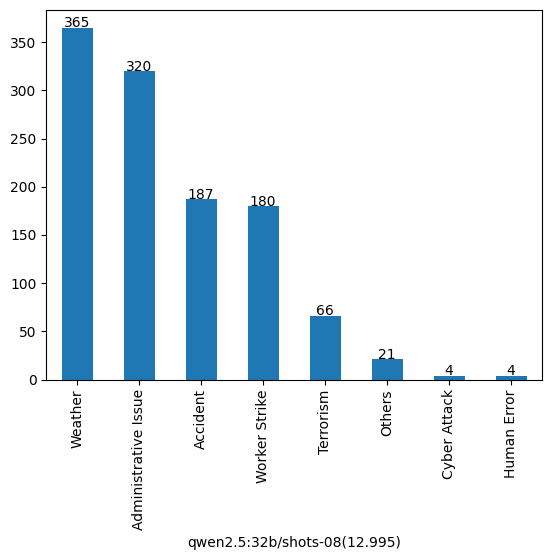

/Users/inflaton/code/engd/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py:836: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["backup"] = df[column_name]


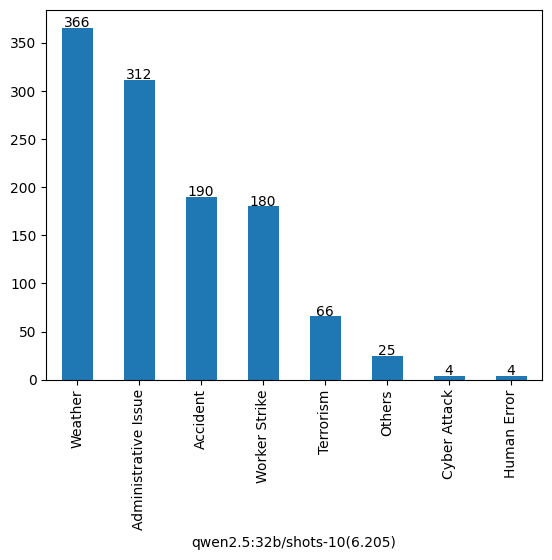

In [46]:
from llm_toolkit.data_utils import plot_bar_chart, extract_answer

for column in result_columns:
    plot_bar_chart(df, column, preprocess_func=extract_answer)